# This dataset containes information about houses in Melbourne, Australia. The target is to predict the price of a house depending on set of features.

# 1. Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score ,roc_curve
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import datetime
import numpy as np

# 2. Data Visualization and Exploration

In [2]:
path = 'melb_data.csv'
data = pd.read_csv(path)
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
data.shape

(13580, 21)

In [4]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [6]:
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = data[col].str.lower()
    data[col] = data[col].str.strip()
    
numerical_columns = data.select_dtypes(exclude=['object']).columns

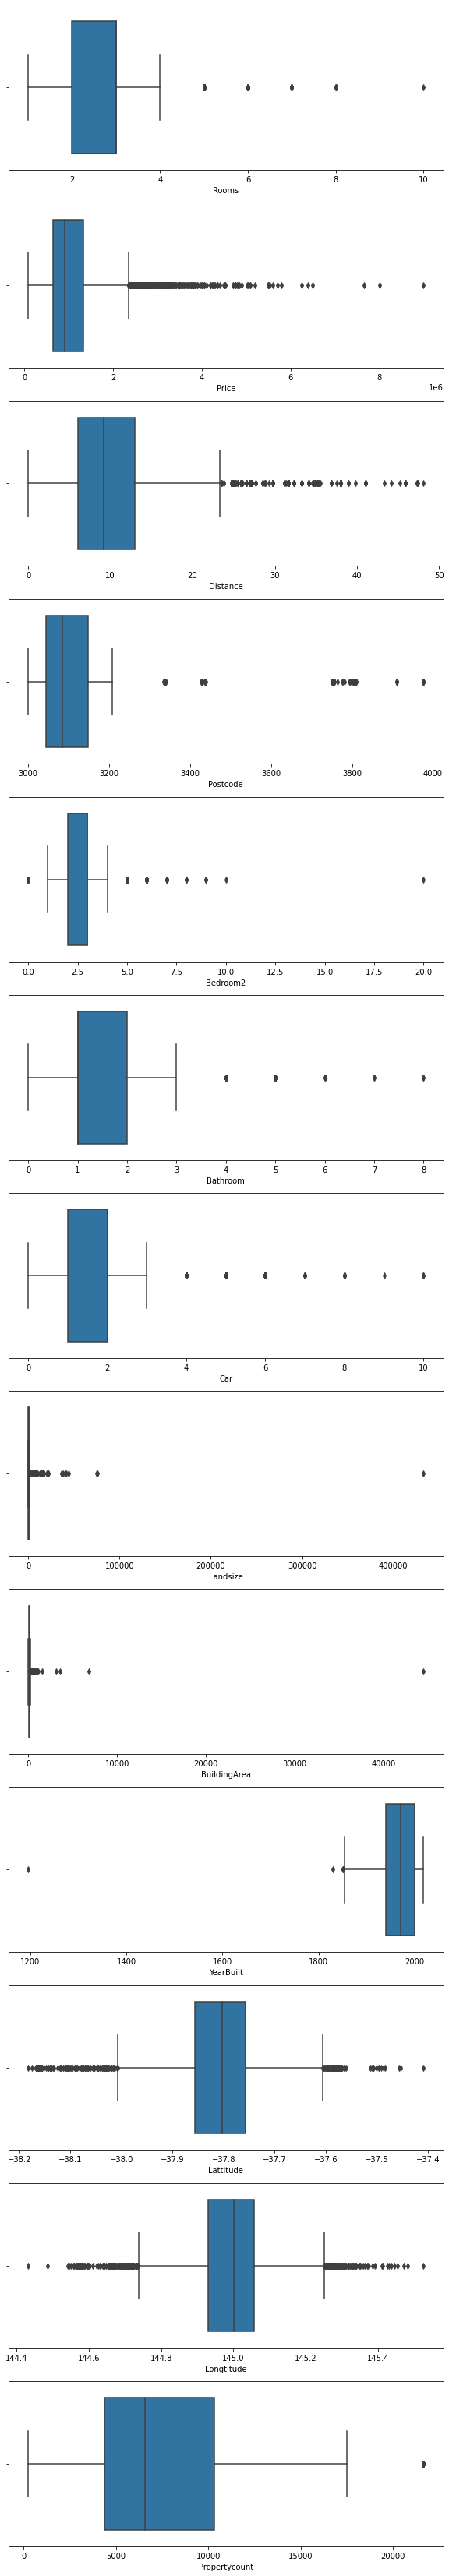

In [7]:
fig, axs = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10,60))
for i in range(len(numerical_columns)):
    sns.boxplot(x=data[numerical_columns[i]], ax = axs[i])

### Notes about the next cell
- We notice from the description above that the min value for both 'Landsize' and 'BuildnigArea' features is zero, and this is definitely wrong. So we will consider every value equals zero in these two features as Null.
- We notice from the box plots above that features 'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount' have very obvious outliers, So we will remove these outliers.

In [8]:
data.BuildingArea[data['BuildingArea']==0] = None
data.Landsize[data['Landsize']==0] = None

data = data[~(data['Landsize'] > 400000)]
data = data[~(data['BuildingArea'] > 40000)]
data = data[~(data['YearBuilt'] < 1800)]
data = data[~(data['Propertycount'] > 20000)]

data.shape

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11616\2190330862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.BuildingArea[data['BuildingArea']==0] = None
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11616\2190330862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Landsize[data['Landsize']==0] = None


(13218, 21)

In [9]:
print("The ratio of dropped data:", round((1 - (13218/13580)) * 100, 2))

The ratio of dropped data: 2.67


### Note about the previous cell:
- The ratio we dropped is not big and therefore it will not have a  big effect. So, we will accept it.

In [10]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13218.000000,1.321800e+04,13218.000000,13218.000000,13218.000000,13218.000000,13156.000000,11301.000000,6937.000000,8001.000000,13218.000000,13218.000000,13218.000000
mean,2.941292,1.086006e+06,10.100363,3106.153805,2.918293,1.540853,1.603147,610.141934,146.637554,1964.516685,-37.811812,144.994848,7069.042064
std,0.958882,6.435131e+05,5.934688,91.704981,0.969371,0.694472,0.956485,1486.159637,129.733340,36.473970,0.078667,0.105213,3750.849405
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1830.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,271.000000,94.000000,1940.000000,-37.857930,144.927125,4217.000000
50%,3.000000,9.150000e+05,9.200000,3088.000000,3.000000,1.000000,2.000000,533.000000,127.000000,1970.000000,-37.805300,144.999200,6482.000000
75%,4.000000,1.346000e+06,13.000000,3150.000000,3.000000,2.000000,2.000000,676.000000,175.000000,1999.000000,-37.760480,145.060100,9264.000000
max,10.000000,9.000000e+06,47.400000,3977.000000,20.000000,8.000000,10.000000,76000.000000,6791.000000,2018.000000,-37.408530,145.526350,17496.000000


<AxesSubplot:xlabel='Price', ylabel='Count'>

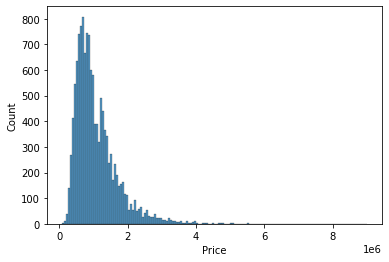

In [11]:
sns.histplot(x= data['Price'])

### NOTE:
#### I want to turn this problem to classification problem so I can apply estimation metrics I learned in theoritcal lessons. I want to make three classe: Cheap (1) , Average(2) , Expensive(3). There is two approaches I am thinking of applying:
- Median way: dividing the data into three equal groups
- Mean way: dividing the range of prices into three equal ranges

In [12]:
group_price_range_length = 3000000
group_size = data.shape[0]/3
data = data.sort_values(by=['Price'])
data ['ind'] = range(data.shape[0])
group_size = int(group_size)

### If prices will be splitted into 3 classes following Median way:

<AxesSubplot:title={'center':'Median Way'}, xlabel='Price', ylabel='Count'>

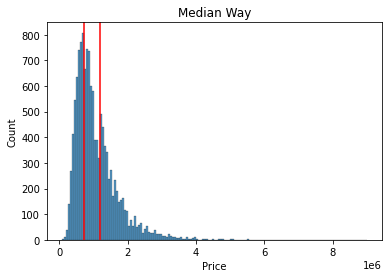

In [13]:
plt.axvline(x= data.iloc[group_size]['Price'], color='red')
plt.axvline(x= data.iloc[2*group_size]['Price'], color= 'red')
plt.title("Median Way")
sns.histplot(x= data['Price'])

### If prices will be splitted into 3 classes following Mean way:

<AxesSubplot:title={'center':'Mean Way'}, xlabel='Price', ylabel='Count'>

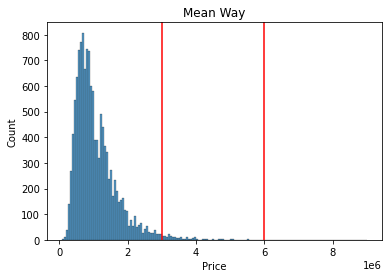

In [14]:
plt.axvline(x= group_price_range_length, color='red')
plt.axvline(x= 2*group_price_range_length, color= 'red')
plt.title("Mean Way")
sns.histplot(x= data['Price'])

### NOTE
- depending on the obervations above, we notice that if we followed the mean way all of our data nearly will belong to one class, and hence there will be no problem to solve. Therefore, we will follow the median way.

In [15]:
def change_price_median(row):
    if (row.ind < group_size):
        row.Price = 1
    elif (row.ind < 2*group_size and row.ind >= group_size):
        row.Price = 2
    else:
        row.Price = 3
    return row

data = data.apply(change_price_median, axis = 'columns')

In [16]:
data = data.loc[:, data.columns != 'ind']
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

## 2.1 Dealing with numerical features

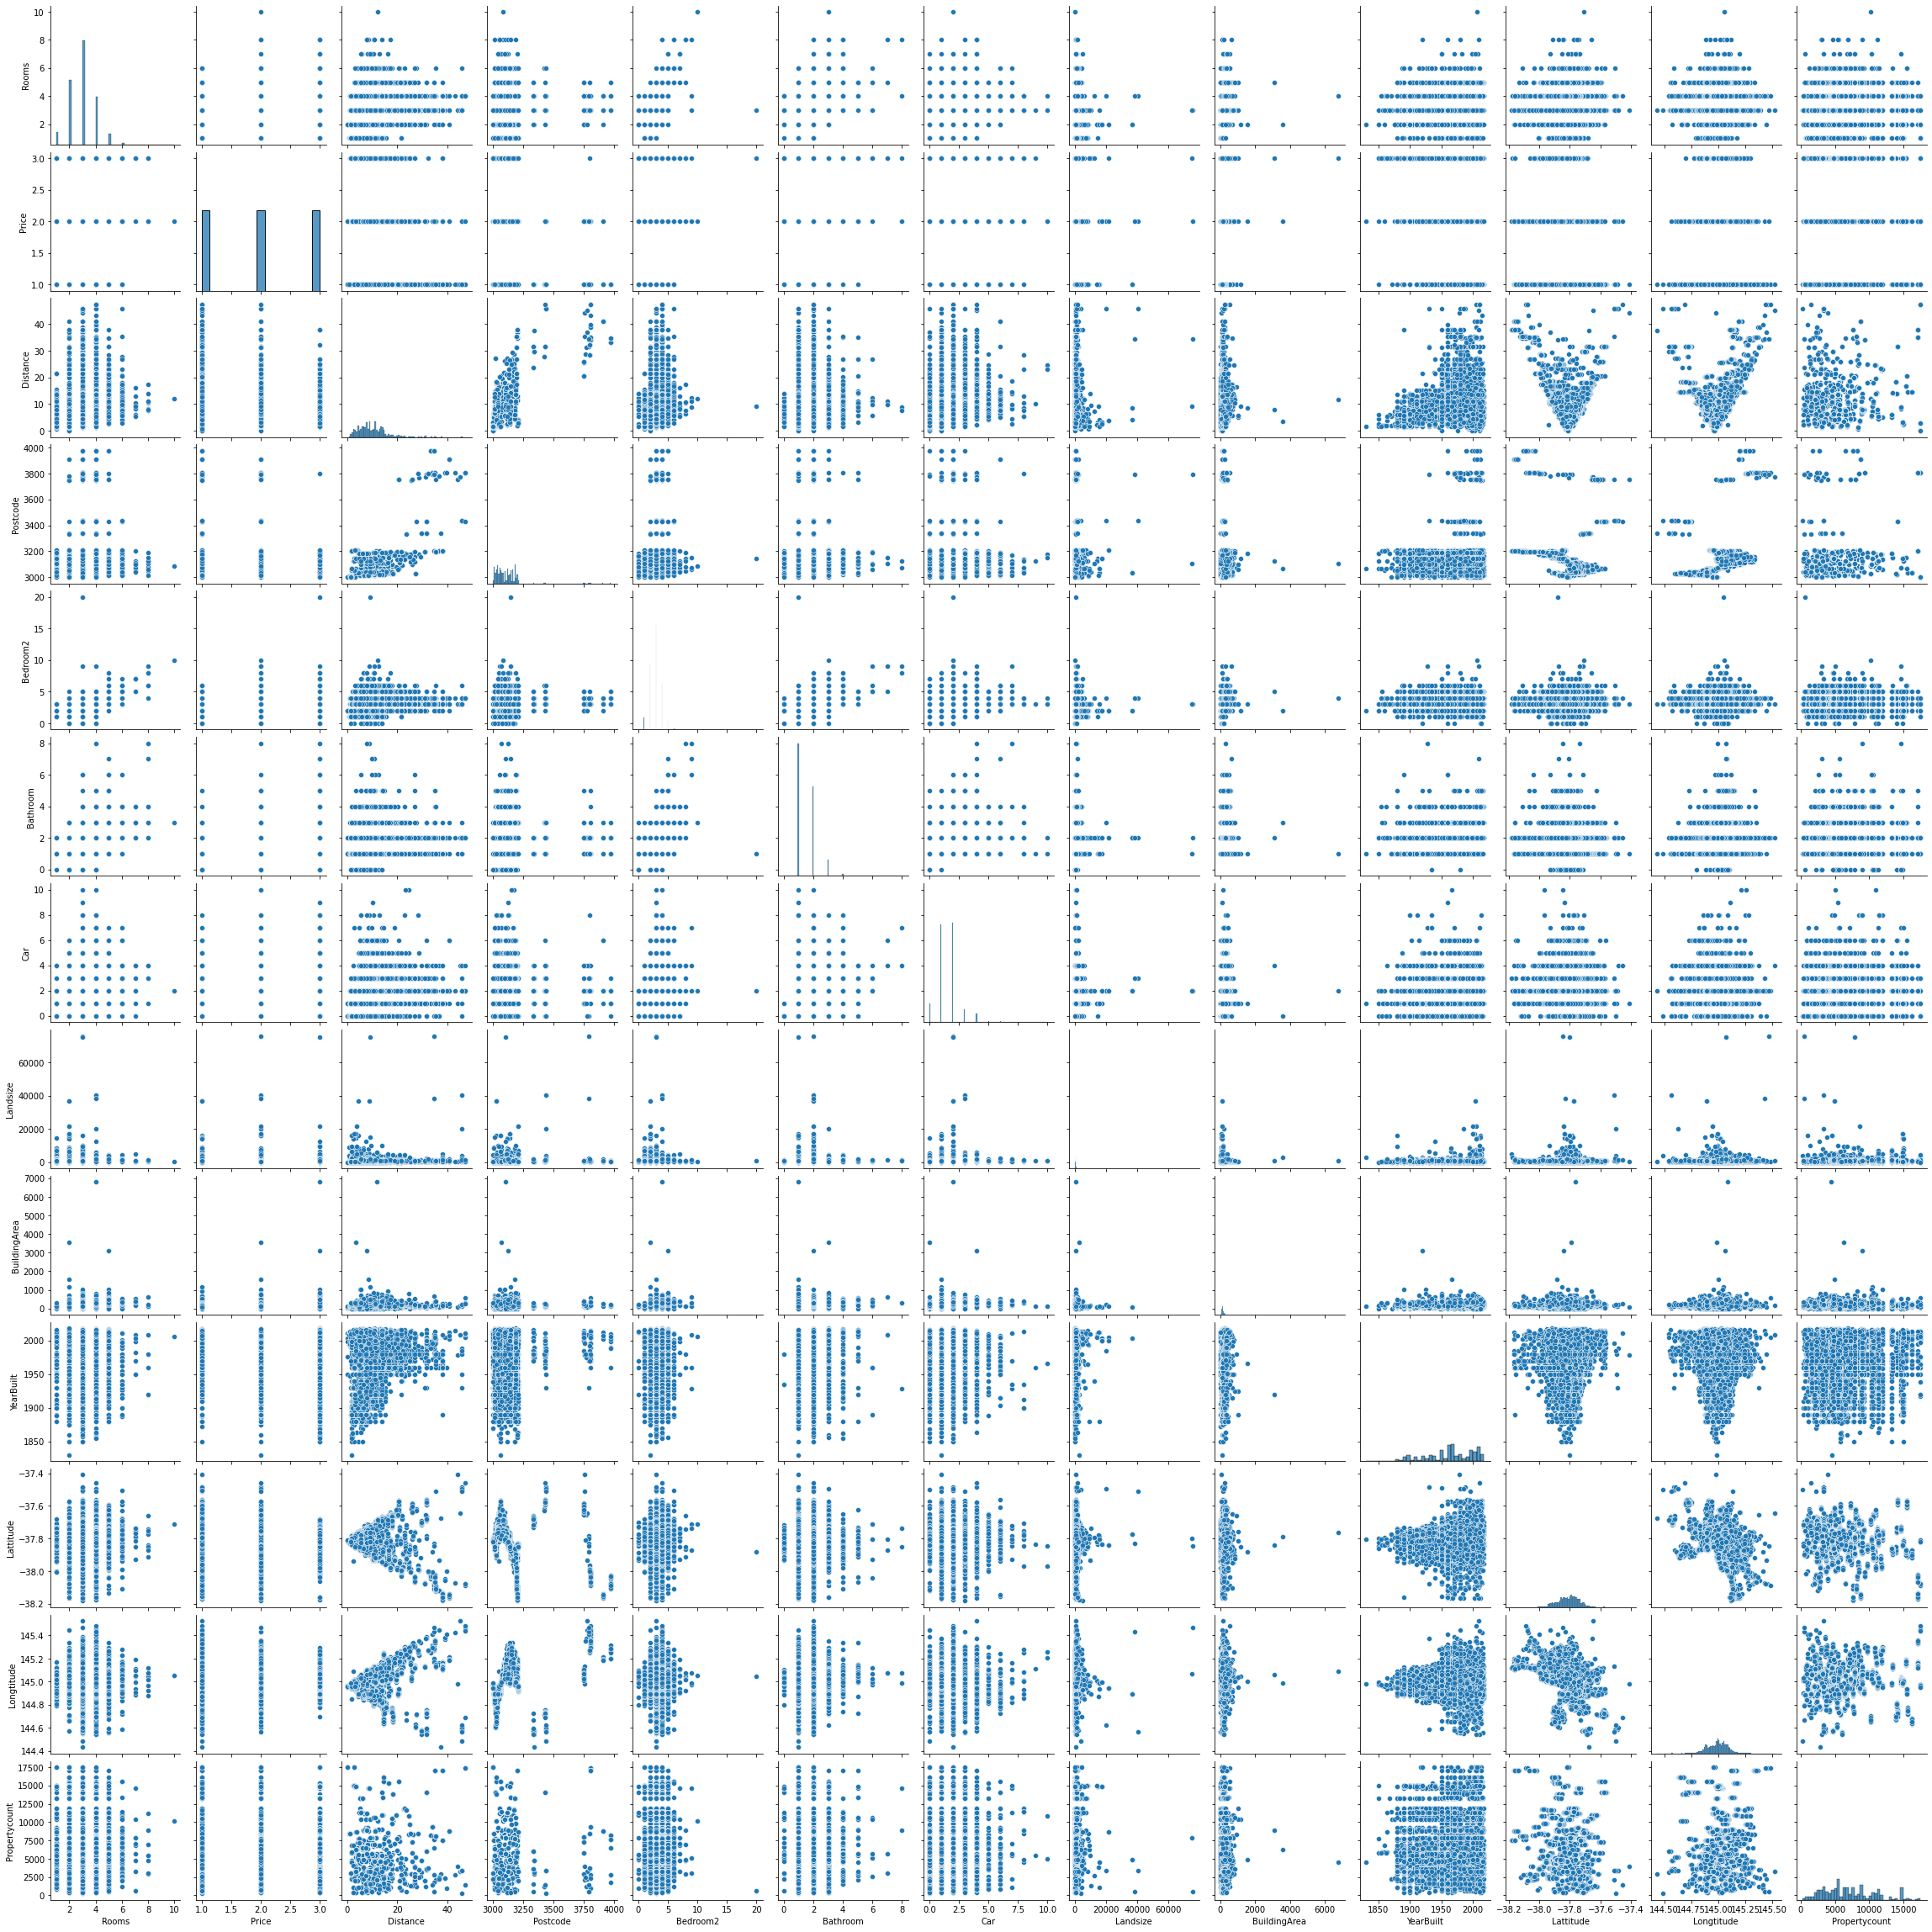

In [17]:
sns.pairplot(data)

### NOTE
- We notice from the pair plots above that there is somewhat of a linear relation between 'Rooms' feature and 'Bedroom2' feature. We will plot the correlation matrix in the next cells to see if we can throw one of them.

In [18]:
data[numerical_columns].corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.477373,0.297510,0.054103,0.944586,0.594757,0.409150,0.001362,0.421985,-0.062154,0.019804,0.103110,-0.083168
Price,0.477373,1.000000,-0.168956,0.072943,0.457105,0.380666,0.205857,-0.020103,0.315384,-0.380293,-0.215822,0.241646,-0.004926
Distance,0.297510,-0.168956,1.000000,0.433792,0.299191,0.129995,0.265207,0.052615,0.116232,0.255286,-0.143268,0.241207,-0.087266
Postcode,0.054103,0.072943,0.433792,1.000000,0.059344,0.110994,0.052798,0.079331,0.057052,0.037925,-0.404979,0.449201,0.111462
Bedroom2,0.944586,0.457105,0.299191,0.059344,1.000000,0.586570,0.406277,0.003198,0.413255,-0.049911,0.020144,0.104600,-0.081973
Bathroom,0.594757,0.380666,0.129995,0.110994,0.586570,1.000000,0.327232,0.029077,0.377118,0.159098,-0.061598,0.122253,-0.023913
Car,0.409150,0.205857,0.265207,0.052798,0.406277,0.327232,1.000000,0.052671,0.231229,0.121417,-0.012096,0.064810,-0.055798
Landsize,0.001362,-0.020103,0.052615,0.079331,0.003198,0.029077,0.052671,1.000000,0.025051,0.084026,0.001199,0.039821,0.003845
BuildingArea,0.421985,0.315384,0.116232,0.057052,0.413255,0.377118,0.231229,0.025051,1.000000,0.025544,-0.026238,0.088349,-0.039871
YearBuilt,-0.062154,-0.380293,0.255286,0.037925,-0.049911,0.159098,0.121417,0.084026,0.025544,1.000000,0.052292,-0.002008,-0.015849


<AxesSubplot:>

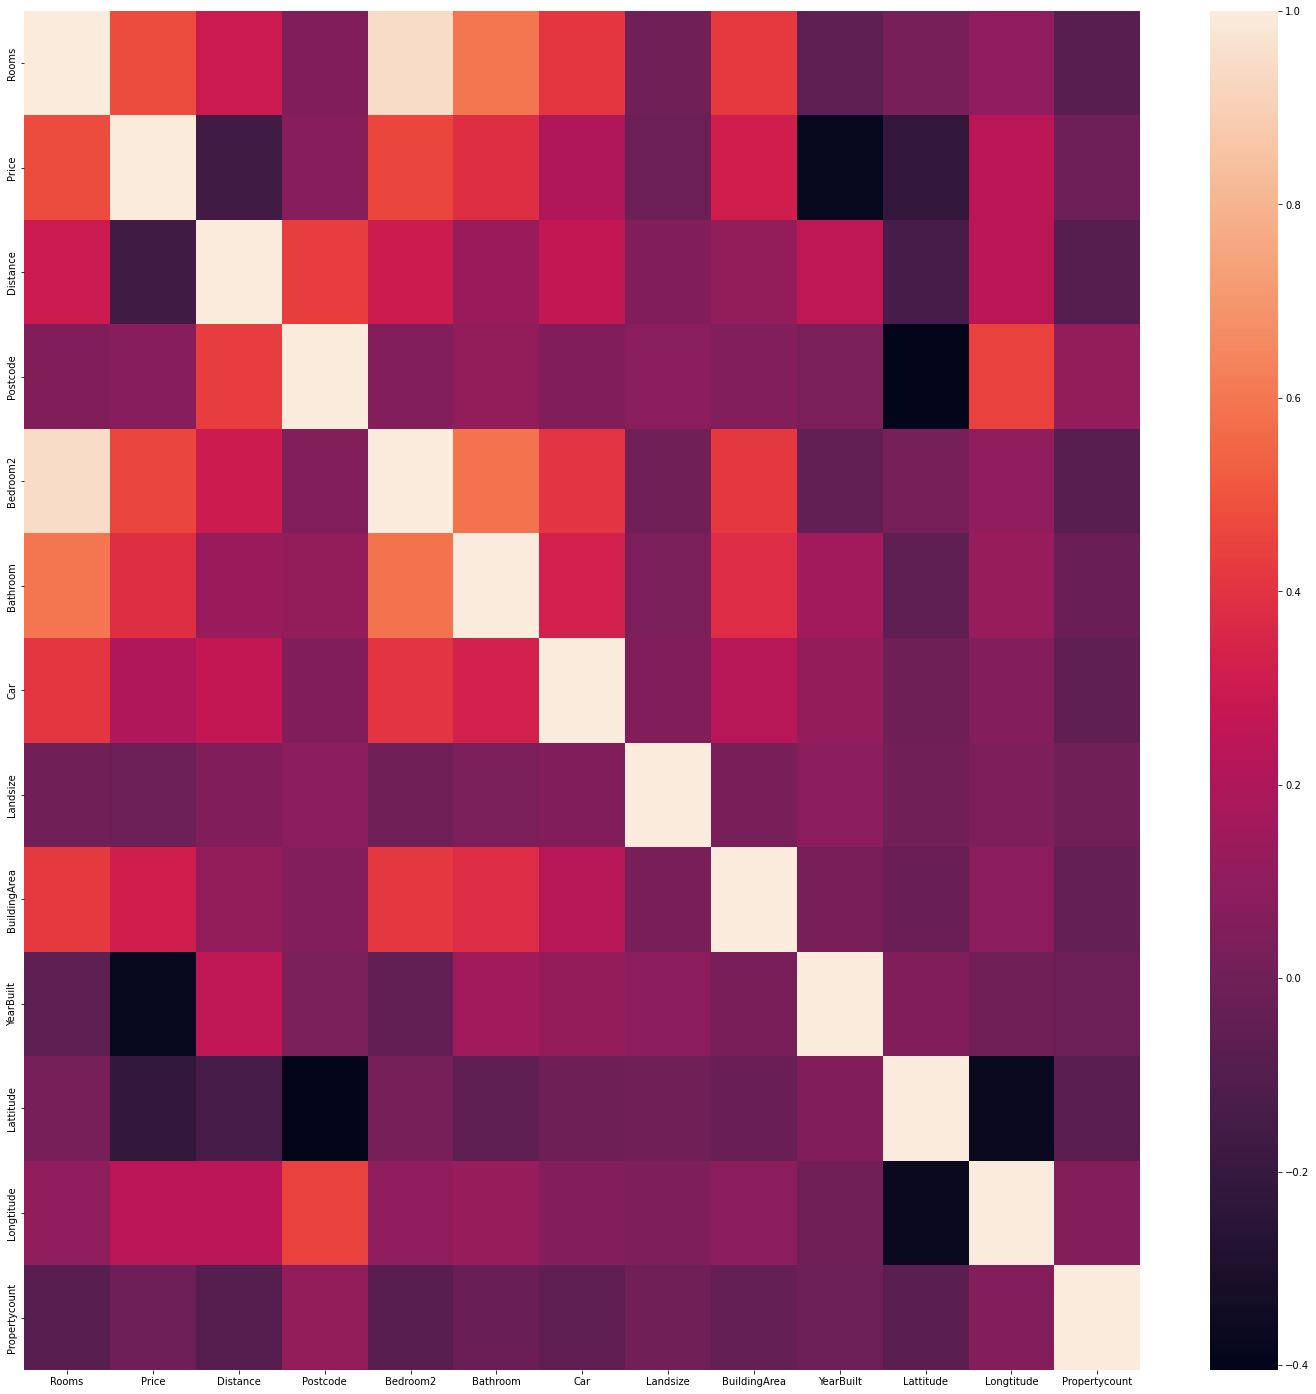

In [19]:
plt.figure(figsize=(25,25))
sns.heatmap(data[numerical_columns].corr())

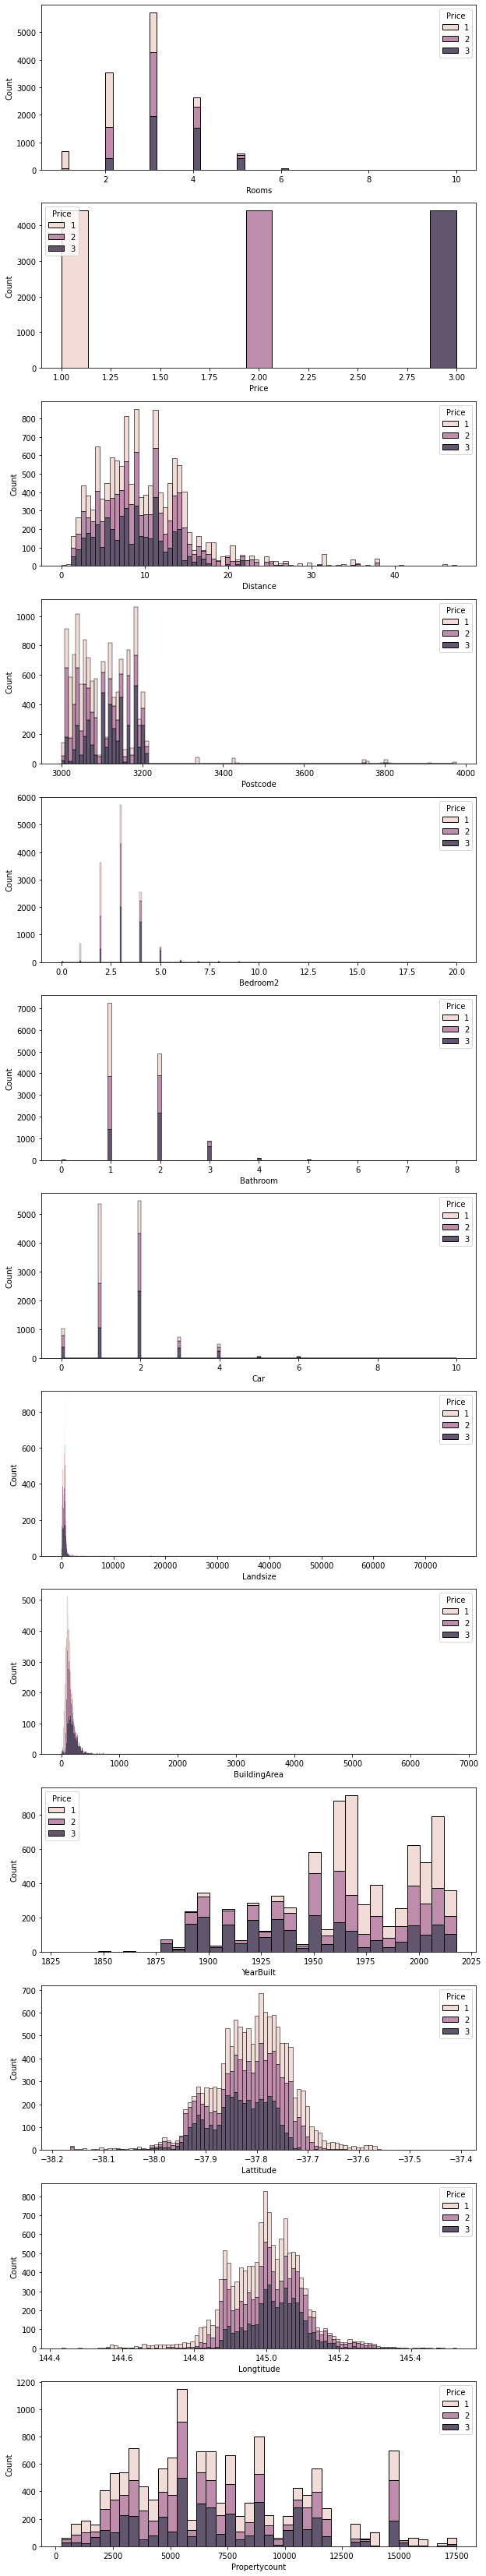

In [20]:
fig, axs = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10,60))
for i in range(len(numerical_columns)):
    sns.histplot(x = data[numerical_columns[i]], hue=data.Price, multiple='stack', ax=axs[i])

## Note about the next cell:
- Since there is a high correlation between 'Bedrrom2' and 'Rooms' features (equals 0.944586) as we see above, we can throw one of them away because it will not add any new information.

In [21]:
data = data.loc[:, data.columns != 'Bedroom2']
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount'],
      dtype='object')

## 2.2 Dealing with categorical features

In [22]:
data[categorical_columns].describe()

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,13218,13218,13218,13218,13218,13218,11886,13218
unique,312,13020,3,5,268,58,33,8
top,Richmond,13 Robinson St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,260,3,9193,8759,1490,467,1163,4695


### NOTE about the previous cell:
- We will use One Hot Encoding to encode 'Type', 'Method', 'Regionname' features because their unique values are little.
- For features: 'Suburb', 'Address', 'SellerG', 'CouncilArea': the number of unique values is big so we will follow another way as we will see.

In [23]:
data.Suburb.value_counts().head(20)

Richmond          260
Bentleigh East    249
Preston           239
Brunswick         222
Essendon          220
South Yarra       202
Glen Iris         195
Hawthorn          191
Coburg            190
Northcote         188
Brighton          186
Kew               177
Pascoe Vale       171
Balwyn North      171
Yarraville        164
St Kilda          162
Glenroy           159
Port Melbourne    153
Moonee Ponds      149
Carnegie          146
Name: Suburb, dtype: int64

In [24]:
data.Address.value_counts().head(20)

13 Robinson St       3
14 Arthur St         3
53 William St        3
5 Charles St         3
36 Aberfeldie St     3
5 Margaret St        3
1/1 Clarendon St     3
2 Bruce St           3
28 Blair St          3
406/152 Sturt St     2
12 Gordon St         2
6/13 Alexander St    2
8 Perth Ct           2
17 Gordon St         2
13 Hudson St         2
6 The Mews           2
16 Coronation St     2
16 Hayes Pde         2
3/39 Dover St        2
443 Punt Rd          2
Name: Address, dtype: int64

In [25]:
data.SellerG.value_counts().head(20)

Nelson           1490
Jellis           1316
hockingstuart    1141
Barry             921
Marshall          659
Buxton            632
Ray               629
Biggin            393
Brad              340
Woodards          300
Fletchers         300
Jas               243
Greg              239
McGrath           218
Sweeney           216
Noel              205
Miles             196
RT                184
Gary              170
Harcourts         159
Name: SellerG, dtype: int64

In [26]:
data.CouncilArea.value_counts().head(20)

Moreland         1163
Boroondara       1160
Moonee Valley     997
Glen Eira         848
Stonnington       719
Maribyrnong       692
Yarra             646
Port Phillip      628
Darebin           611
Banyule           594
Bayside           489
Melbourne         470
Hobsons Bay       434
Brimbank          424
Monash            332
Manningham        311
Whitehorse        304
Kingston          207
Whittlesea        167
Hume              164
Name: CouncilArea, dtype: int64

## Note about the cells above and the next cell:
We were planning to do the following:
- For a certain feature, if we noticed that there are some unique values that are much more repeated than the others, we were going to replace all the others with a new class: let it be 'Other'. But we notice that this is not the case for 'Address'and 'Suburb'and 'CouncilArea' features. Maybe we can apply it for 'SellerG' feature, but also there is not that much difference between the repetitions of its unique values. So, we will apply ordinal encoding to all of them.

In [27]:
cols = ['Suburb' , 'Address','SellerG','CouncilArea']

ordinal_encoder = OrdinalEncoder()
data[cols] = ordinal_encoder.fit_transform(data[cols])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11616\468838130.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cols] = ordinal_encoder.fit_transform(data[cols])


### Note about the next cell:
- The Date feature represents the selling date feature. We will replace it with an integer represents how much days this date is far from the day '1-1-1900', since the probability of having a house last sold in a year before 1900 nowadays is nearly zero.

In [28]:
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)
data['Date'].describe()

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '25/02/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28/05/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/09/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\p

count                   13218
unique                     58
top       2017-05-27 00:00:00
freq                      467
first     2016-01-28 00:00:00
last      2017-12-08 00:00:00
Name: Date, dtype: object

## Note about the previous cell:
- Since we convert Date to be datetime, then there is nothing wrong with it (eg. a day greater than the 31st or February having a 30th)

In [29]:
x = datetime.datetime(1900, 1, 1)
data['Date'] = data['Date'] - x
data['Date'] = (data['Date']/np.timedelta64(1, 'D')).astype('int')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11616\2241888864.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = data['Date'] - x
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11616\2241888864.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = (data['Date']/np.timedelta64(1, 'D')).astype('int')


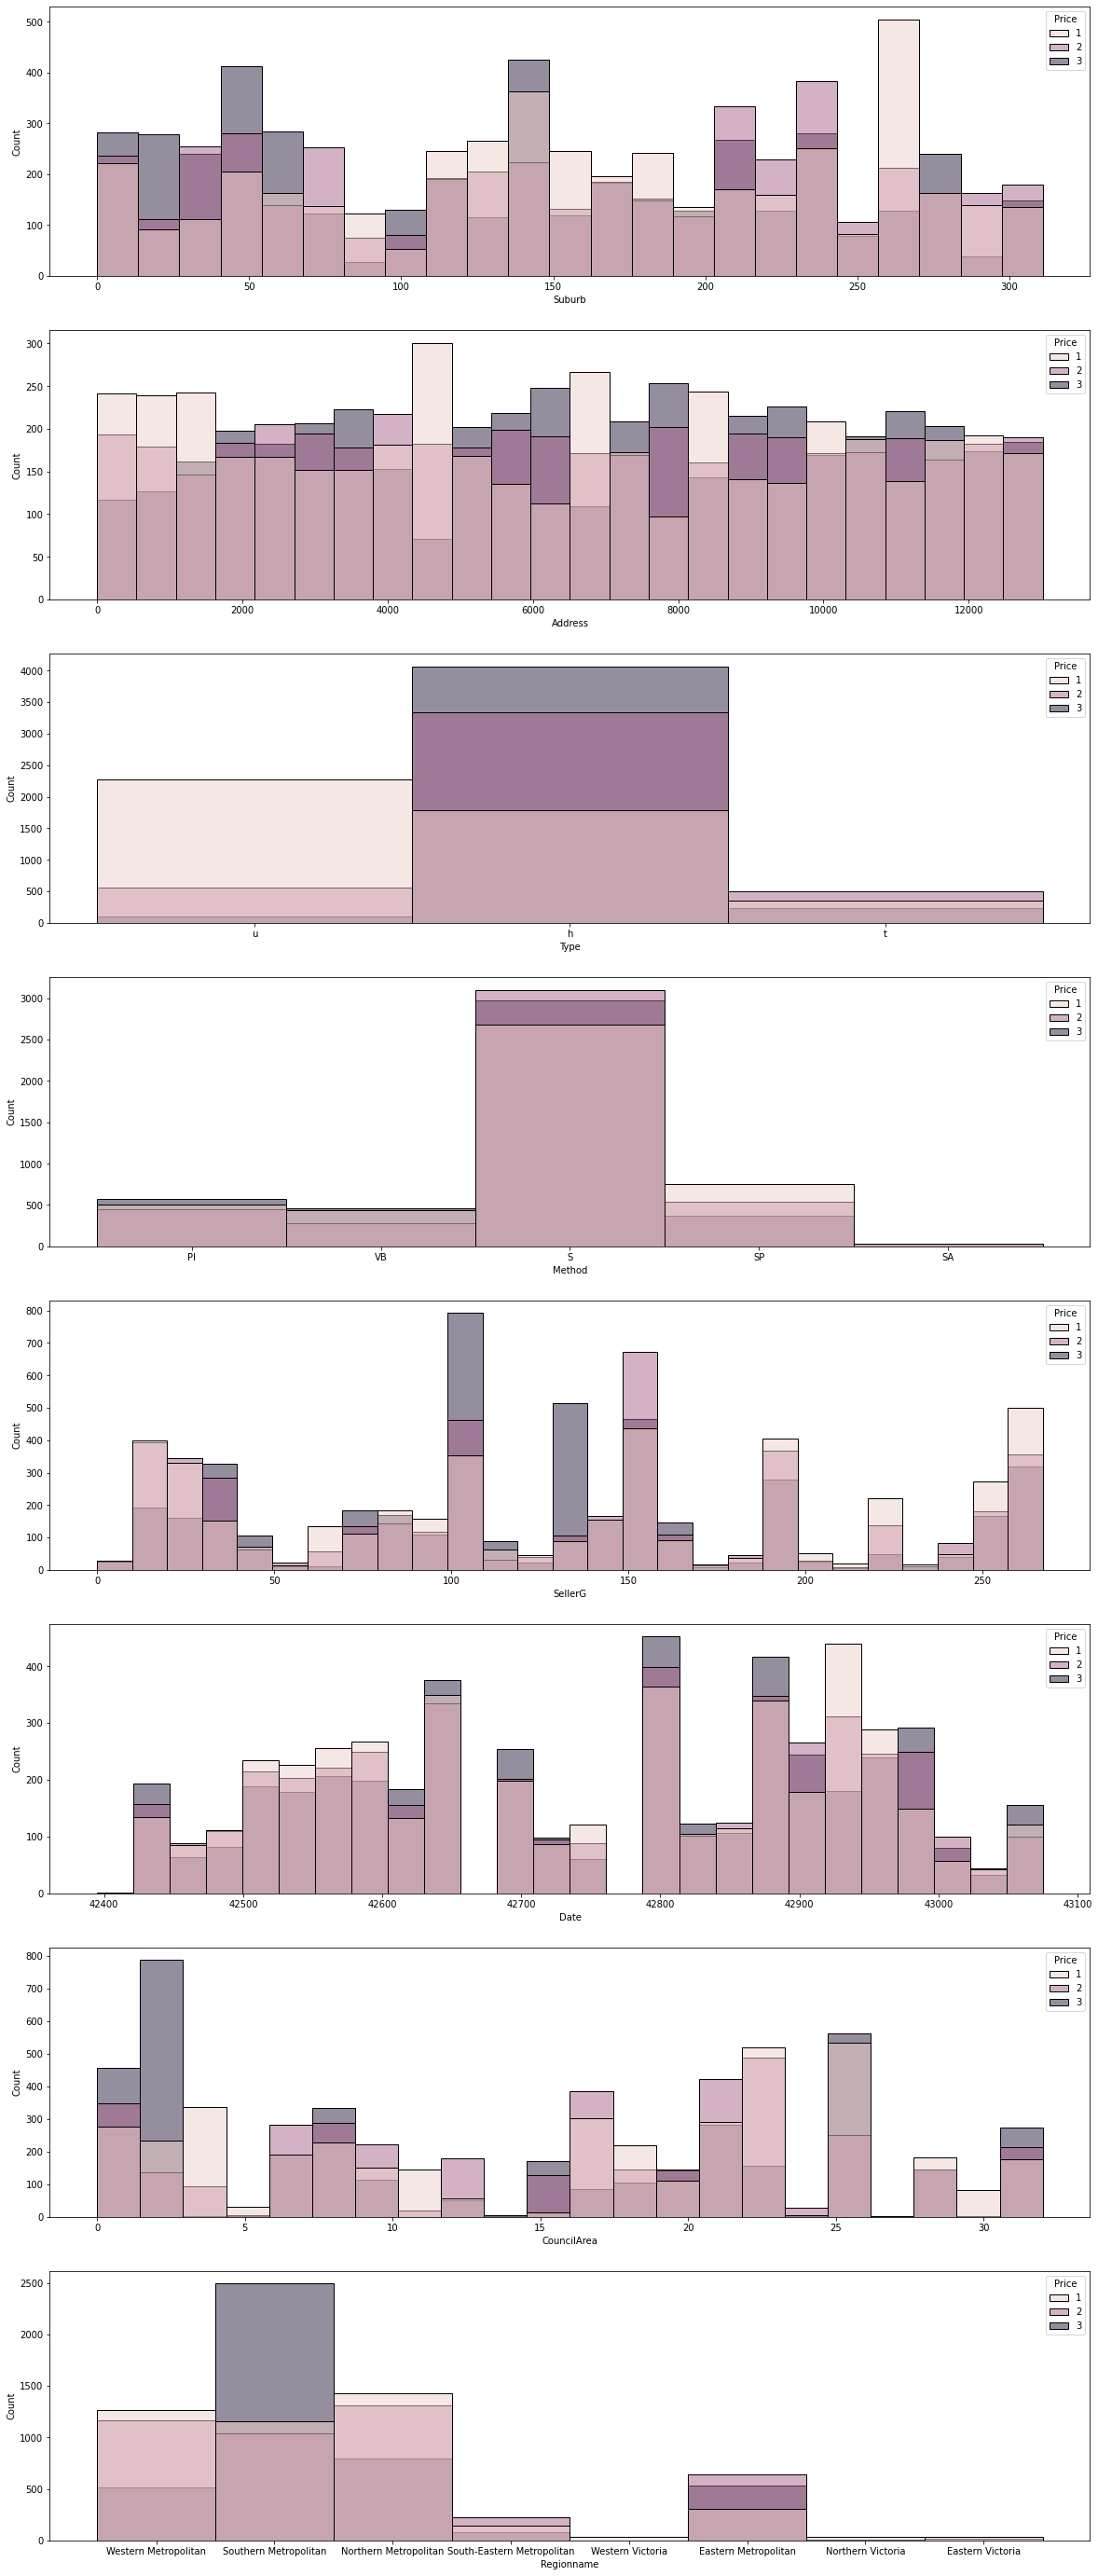

In [32]:
fig, axs = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(20,50))
for i in range(len(categorical_columns)):
    sns.histplot(x = data[categorical_columns[i]], hue=data.Price, ax=axs[i])


## Notes about previous cells and next cell:
- We notice that all 'Address' feature bins are nearly the same height, and this is because of the big number of unique values of this feature. This indicates that this feature does not add a lot of information.
- Generally, sometimes there is an equal distribution of target classes in many bins for some features, which indicates at first glance that these features are not important since their values do not contribute to distinguishing classes. But they might make a difference if they were combined with other features. So, we will not remove them. We will only remove 'Address' feature for  the above reason.

In [33]:
data = data.loc[:, data.columns != 'Address']

In [34]:
cols = ['Type' , 'Method','Regionname']

one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_data = pd.DataFrame(one_hot_encoder.fit_transform(data[cols]))

OH_data.index = data.index

data = data.drop(cols, axis=1)
data = pd.concat([data, OH_data], axis=1)

In [35]:
data.columns

Index([       'Suburb',         'Rooms',         'Price',       'SellerG',
                'Date',      'Distance',      'Postcode',      'Bathroom',
                 'Car',      'Landsize',  'BuildingArea',     'YearBuilt',
         'CouncilArea',     'Lattitude',    'Longtitude', 'Propertycount',
                     0,               1,               2,               3,
                     4,               5,               6,               7,
                     8,               9,              10,              11,
                    12,              13,              14,              15],
      dtype='object')

In [36]:
data.shape

(13218, 32)

# 3. Data Cleaning

In [37]:
data.isnull().sum()

Suburb              0
Rooms               0
Price               0
SellerG             0
Date                0
Distance            0
Postcode            0
Bathroom            0
Car                62
Landsize         1917
BuildingArea     6281
YearBuilt        5217
CouncilArea      1332
Lattitude           0
Longtitude          0
Propertycount       0
0                   0
1                   0
2                   0
3                   0
4                   0
5                   0
6                   0
7                   0
8                   0
9                   0
10                  0
11                  0
12                  0
13                  0
14                  0
15                  0
dtype: int64

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

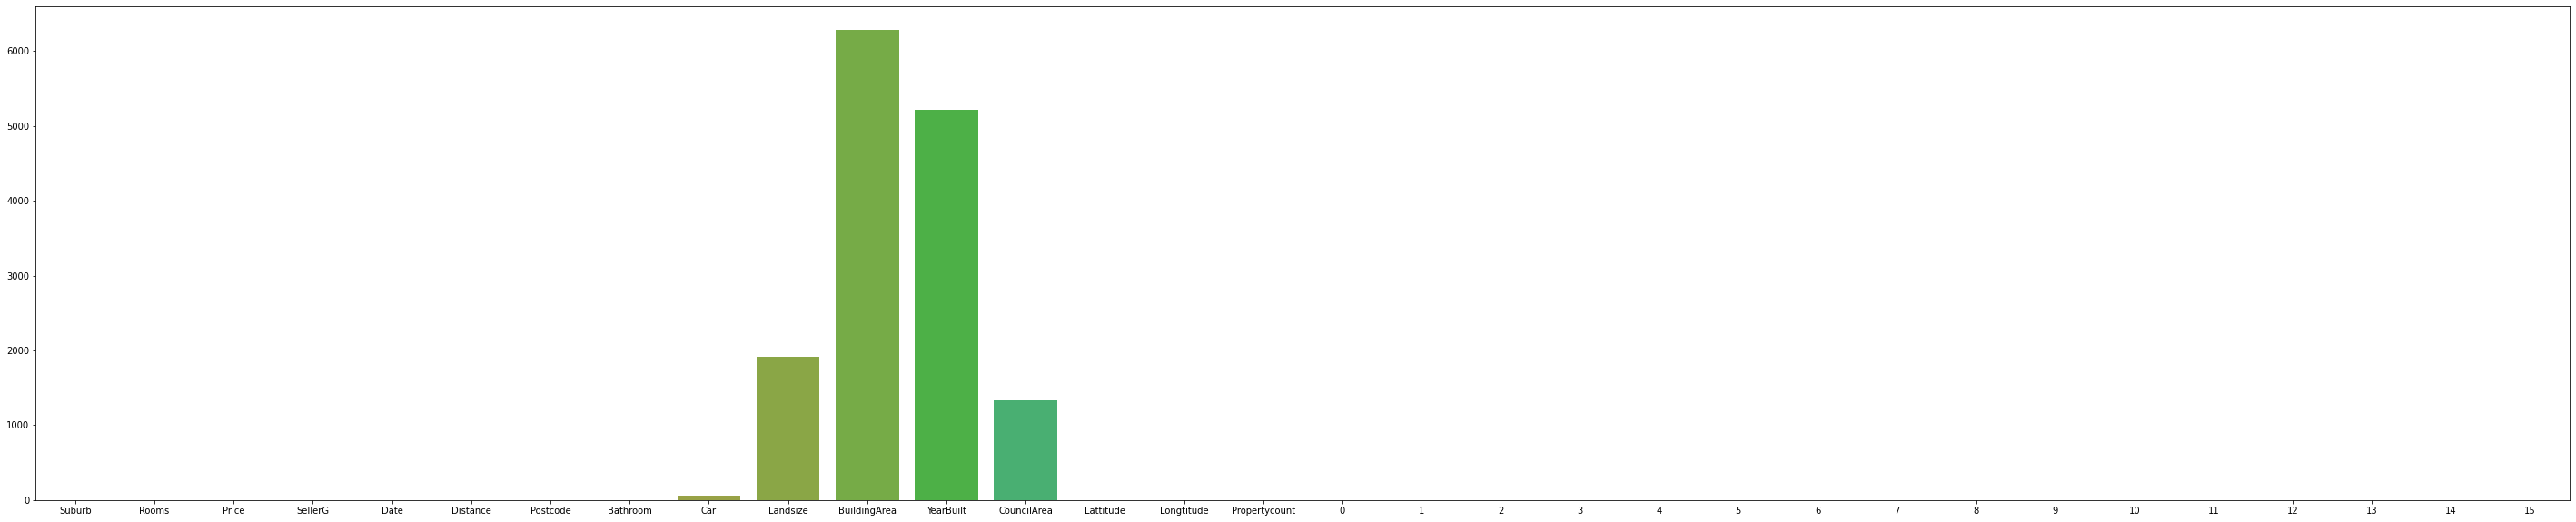

In [38]:
plt.figure(figsize=(50,10))

sns.barplot(list((dict(data.isnull().sum())).keys()),list((dict(data.isnull().sum())).values()))

## Why Some data is missing?
- 'Car' feature represents the number of car spots near the house. This feature might not there because some houses do not have car spots. So instead of writing '0', they sometimes registered it as Null. So, we will replace it with 0.
- 'Building Area', 'Landsize', 'YearBuilt', 'CouncilArea' are missing because they were not recorded, not because they might not exist originally. We will replace 'BuildingArea' ,'Landsize'null values with mean.
- 'YearBuilt' feature represents the year the house was built, we will replace null values of this feature with mode.
- 'CouncilArea' feature represents the Government Council Area this house belongs to. I don't know about the government administration system in Australia, but often the local Council Area is responsible for properties located in a particular location. So it is possible that this feature is well dependent on the suburb feature. So we fill the null 'CouncilArea' feature for a certain house with the most frequent value of 'CouncilArea' feature for houses that belongs to the same suburb this house belongs.

In [39]:
def fill_CouncilArea(row):
    if (pd.isnull(row.CouncilArea)):
        if(data[data.Suburb == row.Suburb].CouncilArea.mode().shape[0] != 0):
            row.CouncilArea = data[data.Suburb == row.Suburb].CouncilArea.mode()[0]
    return row

data = data.apply(fill_CouncilArea, axis = 'columns')
data[pd.isnull(data.CouncilArea)]

,Suburb,Rooms,Price,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,...,6,7,8,9,10,11,12,13,14,15
12865,289.0,3.0,1.0,196.0,42992.0,44.2,3756.0,1.0,1.0,502.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
13381,53.0,3.0,1.0,257.0,42971.0,14.8,3023.0,2.0,2.0,461.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13264,229.0,4.0,1.0,87.0,42999.0,23.8,3335.0,2.0,2.0,477.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12438,17.0,3.0,1.0,257.0,42985.0,16.5,3049.0,2.0,2.0,607.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12251,53.0,3.0,1.0,90.0,42801.0,14.8,3023.0,2.0,2.0,631.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13494,198.0,4.0,1.0,73.0,42971.0,34.1,3793.0,2.0,2.0,1611.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
data['CouncilArea'].fillna(data['CouncilArea'].mode()[0], inplace=True)

In [41]:
data['Car'].fillna(0, inplace=True)

In [42]:
data['Landsize'].fillna(data['Landsize'].mean(), inplace=True)

In [43]:
data['BuildingArea'].fillna(data['BuildingArea'].mean(), inplace=True)

In [44]:
data['YearBuilt'].fillna(data['YearBuilt'].mode()[0], inplace=True)

In [45]:
data.isnull().sum()

Suburb           0
Rooms            0
Price            0
SellerG          0
Date             0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Propertycount    0
0                0
1                0
2                0
3                0
4                0
5                0
6                0
7                0
8                0
9                0
10               0
11               0
12               0
13               0
14               0
15               0
dtype: int64

# 4. Training and Evaluating Decision Tree Classifier

## 4.1 Hold Out Method Without Hyperparameters Tuning

In [46]:
y= data['Price']
X = data.loc[:, data.columns != 'Price']
model = DecisionTreeClassifier(random_state= 1)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle= True)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, pred))

Accuracy: 0.7367624810892587


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


## 4.2 K-Fold Cross validaiton Method Without Hyperparameters tuning

In [48]:
# K = 10
skf = StratifiedKFold(n_splits=10, shuffle = True, random_state = 42)

In [49]:
model = DecisionTreeClassifier(random_state= 1)
scores = 0
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index][:], X.iloc[test_index][:]
    y_train, y_test = y.iloc[train_index][:], y.iloc[test_index][:]
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores = scores + accuracy_score(y_test, pred)
print(scores/10)

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

0.7411099760530749


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


## 4.3 Hyperparameters Tuning with Grid Search With three splits: Train, Validation, Test

### We chose to tune the Hyperparameters below:
- criterion: the method wich model chooses the best next feature.
- max_features: the number of features model uses to choose the next best split.
- min_impurity_decrease: to control the pruning ratio and avoid overfitting.
- We saw that there is no need to tune features such as max_depth, min_samples_leaf, min_samples_split, because it is enough for the splitting decision to follow impurity decrease.

In [55]:
parameters={"criterion" : ["gini", "entropy", "log_loss"],
           "max_features":["auto","log2","sqrt",None],
           "min_impurity_decrease":[0.00005,0.0001,0.0002,0.0005,0.001,0.002,0.005,0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]}

In [56]:
model = DecisionTreeClassifier(random_state= 1)
tuned_model = GridSearchCV(model,param_grid=parameters,scoring='accuracy',cv=skf,verbose=3)

In [57]:
tuned_model.fit(X_train, y_train)

Fitting 10 folds for each of 168 candidates, totalling 1680 fits
[CV 1/10] END criterion=gini, max_features=auto, min_impurity_decrease=5e-05;, score=0.750 total time=   0.0s
[CV 2/10] END criterion=gini, max_features=auto, min_impurity_decrease=5e-05;, score=0.722 total time=   0.0s
[CV 3/10] END criterion=gini, max_features=auto, min_impurity_decrease=5e-05;, score=0.731 total time=   0.0s
[CV 4/10] END criterion=gini, max_features=auto, min_impurity_decrease=5e-05;, score=0.732 total time=   0.0s
[CV 5/10] END criterion=gini, max_features=auto, min_impurity_decrease=5e-05;, score=0.745 total time=   0.0s
[CV 6/10] END criterion=gini, max_features=auto, min_impurity_decrease=5e-05;, score=0.742 total time=   0.0s
[CV 7/10] END criterion=gini, max_features=auto, min_impurity_decrease=5e-05;, score=0.739 total time=   0.0s
[CV 8/10] END criterion=gini, max_features=auto, min_impurity_decrease=5e-05;, score=0.717 total time=   0.0s
[CV 9/10] END criterion=gini, max_features=auto, min_im

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 1/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.0001;, score=0.753 total time=   0.0s
[CV 2/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.0001;, score=0.724 total time=   0.0s
[CV 3/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.0001;, score=0.743 total time=   0.0s
[CV 4/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.0001;, score=0.756 total time=   0.0s
[CV 5/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.0001;, score=0.726 total time=   0.0s
[CV 6/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.0001;, score=0.734 total time=   0.0s
[CV 7/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.0001;, score=0.747 total time=   0.0s
[CV 8/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.0001;, score=0.730 total time=   0.0s
[CV 9/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.0001;, score=0.727 total time=   0.0s
[

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 2/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.0002;, score=0.715 total time=   0.0s
[CV 3/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.0002;, score=0.761 total time=   0.0s
[CV 4/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.0002;, score=0.739 total time=   0.0s
[CV 5/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.0002;, score=0.736 total time=   0.0s
[CV 6/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.0002;, score=0.745 total time=   0.0s
[CV 7/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.0002;, score=0.725 total time=   0.0s
[CV 8/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.0002;, score=0.746 total time=   0.0s
[CV 9/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.0002;, score=0.728 total time=   0.0s
[CV 10/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.0002;, score=0.724 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 5/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.0005;, score=0.733 total time=   0.0s
[CV 6/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.0005;, score=0.696 total time=   0.0s
[CV 7/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.0005;, score=0.711 total time=   0.0s
[CV 8/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.0005;, score=0.707 total time=   0.0s
[CV 9/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.0005;, score=0.720 total time=   0.0s
[CV 10/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.0005;, score=0.729 total time=   0.0s
[CV 1/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.001;, score=0.707 total time=   0.0s
[CV 2/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.001;, score=0.718 total time=   0.0s
[CV 3/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.001;, score=0.703 total time=   0.0s
[CV

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 10/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.001;, score=0.706 total time=   0.0s
[CV 1/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.002;, score=0.697 total time=   0.0s
[CV 2/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.002;, score=0.687 total time=   0.0s
[CV 3/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.002;, score=0.672 total time=   0.0s
[CV 4/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.002;, score=0.680 total time=   0.0s
[CV 5/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.002;, score=0.698 total time=   0.0s
[CV 6/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.002;, score=0.682 total time=   0.0s
[CV 7/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.002;, score=0.643 total time=   0.0s
[CV 8/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.002;, score=0.686 total time=   0.0s
[CV 9/10]

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 8/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.005;, score=0.656 total time=   0.0s
[CV 9/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.005;, score=0.622 total time=   0.0s
[CV 10/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.005;, score=0.638 total time=   0.0s
[CV 1/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.01;, score=0.423 total time=   0.0s
[CV 2/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.01;, score=0.416 total time=   0.0s
[CV 3/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.01;, score=0.424 total time=   0.0s
[CV 4/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.01;, score=0.437 total time=   0.0s
[CV 5/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.01;, score=0.412 total time=   0.0s
[CV 6/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.01;, score=0.430 total time=   0.0s
[CV 7/10] END c

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 1/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.05;, score=0.333 total time=   0.0s
[CV 2/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.05;, score=0.334 total time=   0.0s
[CV 3/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.05;, score=0.334 total time=   0.0s
[CV 4/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.05;, score=0.334 total time=   0.0s
[CV 5/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.05;, score=0.334 total time=   0.0s
[CV 6/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.05;, score=0.334 total time=   0.0s
[CV 7/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.05;, score=0.333 total time=   0.0s
[CV 8/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.05;, score=0.333 total time=   0.0s
[CV 9/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.05;, score=0.333 total time=   0.0s
[CV 10/10] END crit

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 4/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.5;, score=0.334 total time=   0.0s
[CV 5/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.5;, score=0.334 total time=   0.0s
[CV 6/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.5;, score=0.334 total time=   0.0s
[CV 7/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.5;, score=0.333 total time=   0.0s
[CV 8/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.5;, score=0.333 total time=   0.0s
[CV 9/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.5;, score=0.333 total time=   0.0s
[CV 10/10] END criterion=gini, max_features=auto, min_impurity_decrease=0.5;, score=0.333 total time=   0.0s
[CV 1/10] END criterion=gini, max_features=auto, min_impurity_decrease=1;, score=0.333 total time=   0.0s
[CV 2/10] END criterion=gini, max_features=auto, min_impurity_decrease=1;, score=0.334 total time=   0.0s
[CV 3/10] END criterion=gini, m

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 9/10] END criterion=gini, max_features=log2, min_impurity_decrease=0.0001;, score=0.707 total time=   0.0s
[CV 10/10] END criterion=gini, max_features=log2, min_impurity_decrease=0.0001;, score=0.722 total time=   0.0s
[CV 1/10] END criterion=gini, max_features=log2, min_impurity_decrease=0.0002;, score=0.705 total time=   0.0s
[CV 2/10] END criterion=gini, max_features=log2, min_impurity_decrease=0.0002;, score=0.719 total time=   0.0s
[CV 3/10] END criterion=gini, max_features=log2, min_impurity_decrease=0.0002;, score=0.733 total time=   0.0s
[CV 4/10] END criterion=gini, max_features=log2, min_impurity_decrease=0.0002;, score=0.714 total time=   0.0s
[CV 5/10] END criterion=gini, max_features=log2, min_impurity_decrease=0.0002;, score=0.738 total time=   0.0s
[CV 6/10] END criterion=gini, max_features=log2, min_impurity_decrease=0.0002;, score=0.734 total time=   0.0s
[CV 7/10] END criterion=gini, max_features=log2, min_impurity_decrease=0.0002;, score=0.706 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 10/10] END criterion=gini, max_features=log2, min_impurity_decrease=0.001;, score=0.681 total time=   0.0s
[CV 1/10] END criterion=gini, max_features=log2, min_impurity_decrease=0.002;, score=0.629 total time=   0.0s
[CV 2/10] END criterion=gini, max_features=log2, min_impurity_decrease=0.002;, score=0.631 total time=   0.0s
[CV 3/10] END criterion=gini, max_features=log2, min_impurity_decrease=0.002;, score=0.624 total time=   0.0s
[CV 4/10] END criterion=gini, max_features=log2, min_impurity_decrease=0.002;, score=0.633 total time=   0.0s
[CV 5/10] END criterion=gini, max_features=log2, min_impurity_decrease=0.002;, score=0.633 total time=   0.0s
[CV 6/10] END criterion=gini, max_features=log2, min_impurity_decrease=0.002;, score=0.609 total time=   0.0s
[CV 7/10] END criterion=gini, max_features=log2, min_impurity_decrease=0.002;, score=0.676 total time=   0.0s
[CV 8/10] END criterion=gini, max_features=log2, min_impurity_decrease=0.002;, score=0.669 total time=   0.0s
[CV 9/10]

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 10/10] END criterion=gini, max_features=log2, min_impurity_decrease=0.005;, score=0.585 total time=   0.0s
[CV 1/10] END criterion=gini, max_features=log2, min_impurity_decrease=0.01;, score=0.466 total time=   0.0s
[CV 2/10] END criterion=gini, max_features=log2, min_impurity_decrease=0.01;, score=0.529 total time=   0.0s
[CV 3/10] END criterion=gini, max_features=log2, min_impurity_decrease=0.01;, score=0.484 total time=   0.0s
[CV 4/10] END criterion=gini, max_features=log2, min_impurity_decrease=0.01;, score=0.482 total time=   0.0s
[CV 5/10] END criterion=gini, max_features=log2, min_impurity_decrease=0.01;, score=0.539 total time=   0.0s
[CV 6/10] END criterion=gini, max_features=log2, min_impurity_decrease=0.01;, score=0.465 total time=   0.0s
[CV 7/10] END criterion=gini, max_features=log2, min_impurity_decrease=0.01;, score=0.478 total time=   0.0s
[CV 8/10] END criterion=gini, max_features=log2, min_impurity_decrease=0.01;, score=0.477 total time=   0.0s
[CV 9/10] END cri

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 4/10] END criterion=gini, max_features=log2, min_impurity_decrease=0.05;, score=0.334 total time=   0.0s
[CV 5/10] END criterion=gini, max_features=log2, min_impurity_decrease=0.05;, score=0.334 total time=   0.0s
[CV 6/10] END criterion=gini, max_features=log2, min_impurity_decrease=0.05;, score=0.334 total time=   0.0s
[CV 7/10] END criterion=gini, max_features=log2, min_impurity_decrease=0.05;, score=0.333 total time=   0.0s
[CV 8/10] END criterion=gini, max_features=log2, min_impurity_decrease=0.05;, score=0.333 total time=   0.0s
[CV 9/10] END criterion=gini, max_features=log2, min_impurity_decrease=0.05;, score=0.333 total time=   0.0s
[CV 10/10] END criterion=gini, max_features=log2, min_impurity_decrease=0.05;, score=0.333 total time=   0.0s
[CV 1/10] END criterion=gini, max_features=log2, min_impurity_decrease=0.1;, score=0.333 total time=   0.0s
[CV 2/10] END criterion=gini, max_features=log2, min_impurity_decrease=0.1;, score=0.334 total time=   0.0s
[CV 3/10] END criter

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 7/10] END criterion=gini, max_features=log2, min_impurity_decrease=0.5;, score=0.333 total time=   0.0s
[CV 8/10] END criterion=gini, max_features=log2, min_impurity_decrease=0.5;, score=0.333 total time=   0.0s
[CV 9/10] END criterion=gini, max_features=log2, min_impurity_decrease=0.5;, score=0.333 total time=   0.0s
[CV 10/10] END criterion=gini, max_features=log2, min_impurity_decrease=0.5;, score=0.333 total time=   0.0s
[CV 1/10] END criterion=gini, max_features=log2, min_impurity_decrease=1;, score=0.333 total time=   0.0s
[CV 2/10] END criterion=gini, max_features=log2, min_impurity_decrease=1;, score=0.334 total time=   0.0s
[CV 3/10] END criterion=gini, max_features=log2, min_impurity_decrease=1;, score=0.334 total time=   0.0s
[CV 4/10] END criterion=gini, max_features=log2, min_impurity_decrease=1;, score=0.334 total time=   0.0s
[CV 5/10] END criterion=gini, max_features=log2, min_impurity_decrease=1;, score=0.334 total time=   0.0s
[CV 6/10] END criterion=gini, max_fea

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 6/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=5e-05;, score=0.742 total time=   0.0s
[CV 7/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=5e-05;, score=0.739 total time=   0.0s
[CV 8/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=5e-05;, score=0.717 total time=   0.0s
[CV 9/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=5e-05;, score=0.727 total time=   0.0s
[CV 10/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=5e-05;, score=0.733 total time=   0.0s
[CV 1/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.0001;, score=0.753 total time=   0.0s
[CV 2/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.0001;, score=0.724 total time=   0.0s
[CV 3/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.0001;, score=0.743 total time=   0.0s
[CV 4/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.0001;, score=0.756 total time=   0.0s
[CV 5

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 6/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.0001;, score=0.734 total time=   0.0s
[CV 7/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.0001;, score=0.747 total time=   0.0s
[CV 8/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.0001;, score=0.730 total time=   0.0s
[CV 9/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.0001;, score=0.727 total time=   0.0s
[CV 10/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.0001;, score=0.733 total time=   0.0s
[CV 1/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.0002;, score=0.739 total time=   0.0s
[CV 2/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.0002;, score=0.715 total time=   0.0s
[CV 3/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.0002;, score=0.761 total time=   0.0s
[CV 4/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.0002;, score=0.739 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 9/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.0002;, score=0.728 total time=   0.0s
[CV 10/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.0002;, score=0.724 total time=   0.0s
[CV 1/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.0005;, score=0.744 total time=   0.0s
[CV 2/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.0005;, score=0.718 total time=   0.0s
[CV 3/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.0005;, score=0.710 total time=   0.0s
[CV 4/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.0005;, score=0.695 total time=   0.0s
[CV 5/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.0005;, score=0.733 total time=   0.0s
[CV 6/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.0005;, score=0.696 total time=   0.0s
[CV 7/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.0005;, score=0.711 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 9/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.002;, score=0.649 total time=   0.0s
[CV 10/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.002;, score=0.681 total time=   0.0s
[CV 1/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.005;, score=0.645 total time=   0.0s
[CV 2/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.005;, score=0.619 total time=   0.0s
[CV 3/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.005;, score=0.643 total time=   0.0s
[CV 4/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.005;, score=0.653 total time=   0.0s
[CV 5/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.005;, score=0.666 total time=   0.0s
[CV 6/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.005;, score=0.636 total time=   0.0s
[CV 7/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.005;, score=0.614 total time=   0.0s
[CV 8/10]

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 10/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.01;, score=0.430 total time=   0.0s
[CV 1/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.02;, score=0.423 total time=   0.0s
[CV 2/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.02;, score=0.416 total time=   0.0s
[CV 3/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.02;, score=0.424 total time=   0.0s
[CV 4/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.02;, score=0.437 total time=   0.0s
[CV 5/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.02;, score=0.412 total time=   0.0s
[CV 6/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.02;, score=0.430 total time=   0.0s
[CV 7/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.02;, score=0.416 total time=   0.0s
[CV 8/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.02;, score=0.428 total time=   0.0s
[CV 9/10] END crit

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 1/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.2;, score=0.333 total time=   0.0s
[CV 2/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.2;, score=0.334 total time=   0.0s
[CV 3/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.2;, score=0.334 total time=   0.0s
[CV 4/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.2;, score=0.334 total time=   0.0s
[CV 5/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.2;, score=0.334 total time=   0.0s
[CV 6/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.2;, score=0.334 total time=   0.0s
[CV 7/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.2;, score=0.333 total time=   0.0s
[CV 8/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.2;, score=0.333 total time=   0.0s
[CV 9/10] END criterion=gini, max_features=sqrt, min_impurity_decrease=0.2;, score=0.333 total time=   0.0s
[CV 10/10] END criterion=gin

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 1/10] END criterion=gini, max_features=None, min_impurity_decrease=5e-05;, score=0.750 total time=   0.0s
[CV 2/10] END criterion=gini, max_features=None, min_impurity_decrease=5e-05;, score=0.745 total time=   0.0s
[CV 3/10] END criterion=gini, max_features=None, min_impurity_decrease=5e-05;, score=0.777 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 4/10] END criterion=gini, max_features=None, min_impurity_decrease=5e-05;, score=0.761 total time=   0.0s
[CV 5/10] END criterion=gini, max_features=None, min_impurity_decrease=5e-05;, score=0.766 total time=   0.0s
[CV 6/10] END criterion=gini, max_features=None, min_impurity_decrease=5e-05;, score=0.721 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 7/10] END criterion=gini, max_features=None, min_impurity_decrease=5e-05;, score=0.750 total time=   0.0s
[CV 8/10] END criterion=gini, max_features=None, min_impurity_decrease=5e-05;, score=0.743 total time=   0.0s
[CV 9/10] END criterion=gini, max_features=None, min_impurity_decrease=5e-05;, score=0.751 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 10/10] END criterion=gini, max_features=None, min_impurity_decrease=5e-05;, score=0.737 total time=   0.0s
[CV 1/10] END criterion=gini, max_features=None, min_impurity_decrease=0.0001;, score=0.772 total time=   0.0s
[CV 2/10] END criterion=gini, max_features=None, min_impurity_decrease=0.0001;, score=0.750 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 3/10] END criterion=gini, max_features=None, min_impurity_decrease=0.0001;, score=0.775 total time=   0.0s
[CV 4/10] END criterion=gini, max_features=None, min_impurity_decrease=0.0001;, score=0.759 total time=   0.0s
[CV 5/10] END criterion=gini, max_features=None, min_impurity_decrease=0.0001;, score=0.775 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 6/10] END criterion=gini, max_features=None, min_impurity_decrease=0.0001;, score=0.734 total time=   0.0s
[CV 7/10] END criterion=gini, max_features=None, min_impurity_decrease=0.0001;, score=0.768 total time=   0.0s
[CV 8/10] END criterion=gini, max_features=None, min_impurity_decrease=0.0001;, score=0.751 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 9/10] END criterion=gini, max_features=None, min_impurity_decrease=0.0001;, score=0.755 total time=   0.0s
[CV 10/10] END criterion=gini, max_features=None, min_impurity_decrease=0.0001;, score=0.752 total time=   0.0s
[CV 1/10] END criterion=gini, max_features=None, min_impurity_decrease=0.0002;, score=0.789 total time=   0.0s
[CV 2/10] END criterion=gini, max_features=None, min_impurity_decrease=0.0002;, score=0.765 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 3/10] END criterion=gini, max_features=None, min_impurity_decrease=0.0002;, score=0.771 total time=   0.0s
[CV 4/10] END criterion=gini, max_features=None, min_impurity_decrease=0.0002;, score=0.762 total time=   0.0s
[CV 5/10] END criterion=gini, max_features=None, min_impurity_decrease=0.0002;, score=0.782 total time=   0.0s
[CV 6/10] END criterion=gini, max_features=None, min_impurity_decrease=0.0002;, score=0.735 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 7/10] END criterion=gini, max_features=None, min_impurity_decrease=0.0002;, score=0.762 total time=   0.0s
[CV 8/10] END criterion=gini, max_features=None, min_impurity_decrease=0.0002;, score=0.756 total time=   0.0s
[CV 9/10] END criterion=gini, max_features=None, min_impurity_decrease=0.0002;, score=0.772 total time=   0.0s
[CV 10/10] END criterion=gini, max_features=None, min_impurity_decrease=0.0002;, score=0.762 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 1/10] END criterion=gini, max_features=None, min_impurity_decrease=0.0005;, score=0.771 total time=   0.0s
[CV 2/10] END criterion=gini, max_features=None, min_impurity_decrease=0.0005;, score=0.752 total time=   0.0s
[CV 3/10] END criterion=gini, max_features=None, min_impurity_decrease=0.0005;, score=0.764 total time=   0.0s
[CV 4/10] END criterion=gini, max_features=None, min_impurity_decrease=0.0005;, score=0.768 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 5/10] END criterion=gini, max_features=None, min_impurity_decrease=0.0005;, score=0.766 total time=   0.0s
[CV 6/10] END criterion=gini, max_features=None, min_impurity_decrease=0.0005;, score=0.732 total time=   0.0s
[CV 7/10] END criterion=gini, max_features=None, min_impurity_decrease=0.0005;, score=0.752 total time=   0.0s
[CV 8/10] END criterion=gini, max_features=None, min_impurity_decrease=0.0005;, score=0.749 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 9/10] END criterion=gini, max_features=None, min_impurity_decrease=0.0005;, score=0.767 total time=   0.0s
[CV 10/10] END criterion=gini, max_features=None, min_impurity_decrease=0.0005;, score=0.764 total time=   0.0s
[CV 1/10] END criterion=gini, max_features=None, min_impurity_decrease=0.001;, score=0.752 total time=   0.0s
[CV 2/10] END criterion=gini, max_features=None, min_impurity_decrease=0.001;, score=0.725 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 3/10] END criterion=gini, max_features=None, min_impurity_decrease=0.001;, score=0.756 total time=   0.0s
[CV 4/10] END criterion=gini, max_features=None, min_impurity_decrease=0.001;, score=0.730 total time=   0.0s
[CV 5/10] END criterion=gini, max_features=None, min_impurity_decrease=0.001;, score=0.740 total time=   0.0s
[CV 6/10] END criterion=gini, max_features=None, min_impurity_decrease=0.001;, score=0.708 total time=   0.0s
[CV 7/10] END criterion=gini, max_features=None, min_impurity_decrease=0.001;, score=0.741 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 8/10] END criterion=gini, max_features=None, min_impurity_decrease=0.001;, score=0.739 total time=   0.0s
[CV 9/10] END criterion=gini, max_features=None, min_impurity_decrease=0.001;, score=0.740 total time=   0.0s
[CV 10/10] END criterion=gini, max_features=None, min_impurity_decrease=0.001;, score=0.747 total time=   0.0s
[CV 1/10] END criterion=gini, max_features=None, min_impurity_decrease=0.002;, score=0.734 total time=   0.0s
[CV 2/10] END criterion=gini, max_features=None, min_impurity_decrease=0.002;, score=0.708 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 3/10] END criterion=gini, max_features=None, min_impurity_decrease=0.002;, score=0.722 total time=   0.0s
[CV 4/10] END criterion=gini, max_features=None, min_impurity_decrease=0.002;, score=0.710 total time=   0.0s
[CV 5/10] END criterion=gini, max_features=None, min_impurity_decrease=0.002;, score=0.722 total time=   0.0s
[CV 6/10] END criterion=gini, max_features=None, min_impurity_decrease=0.002;, score=0.704 total time=   0.0s
[CV 7/10] END criterion=gini, max_features=None, min_impurity_decrease=0.002;, score=0.712 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 8/10] END criterion=gini, max_features=None, min_impurity_decrease=0.002;, score=0.707 total time=   0.0s
[CV 9/10] END criterion=gini, max_features=None, min_impurity_decrease=0.002;, score=0.705 total time=   0.0s
[CV 10/10] END criterion=gini, max_features=None, min_impurity_decrease=0.002;, score=0.728 total time=   0.0s
[CV 1/10] END criterion=gini, max_features=None, min_impurity_decrease=0.005;, score=0.711 total time=   0.0s
[CV 2/10] END criterion=gini, max_features=None, min_impurity_decrease=0.005;, score=0.686 total time=   0.0s
[CV 3/10] END criterion=gini, max_features=None, min_impurity_decrease=0.005;, score=0.697 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 4/10] END criterion=gini, max_features=None, min_impurity_decrease=0.005;, score=0.676 total time=   0.0s
[CV 5/10] END criterion=gini, max_features=None, min_impurity_decrease=0.005;, score=0.697 total time=   0.0s
[CV 6/10] END criterion=gini, max_features=None, min_impurity_decrease=0.005;, score=0.681 total time=   0.0s
[CV 7/10] END criterion=gini, max_features=None, min_impurity_decrease=0.005;, score=0.683 total time=   0.0s
[CV 8/10] END criterion=gini, max_features=None, min_impurity_decrease=0.005;, score=0.691 total time=   0.0s
[CV 9/10] END criterion=gini, max_features=None, min_impurity_decrease=0.005;, score=0.664 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 10/10] END criterion=gini, max_features=None, min_impurity_decrease=0.005;, score=0.702 total time=   0.0s
[CV 1/10] END criterion=gini, max_features=None, min_impurity_decrease=0.01;, score=0.657 total time=   0.0s
[CV 2/10] END criterion=gini, max_features=None, min_impurity_decrease=0.01;, score=0.657 total time=   0.0s
[CV 3/10] END criterion=gini, max_features=None, min_impurity_decrease=0.01;, score=0.646 total time=   0.0s
[CV 4/10] END criterion=gini, max_features=None, min_impurity_decrease=0.01;, score=0.655 total time=   0.0s
[CV 5/10] END criterion=gini, max_features=None, min_impurity_decrease=0.01;, score=0.655 total time=   0.0s
[CV 6/10] END criterion=gini, max_features=None, min_impurity_decrease=0.01;, score=0.629 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 7/10] END criterion=gini, max_features=None, min_impurity_decrease=0.01;, score=0.662 total time=   0.0s
[CV 8/10] END criterion=gini, max_features=None, min_impurity_decrease=0.01;, score=0.650 total time=   0.0s
[CV 9/10] END criterion=gini, max_features=None, min_impurity_decrease=0.01;, score=0.648 total time=   0.0s
[CV 10/10] END criterion=gini, max_features=None, min_impurity_decrease=0.01;, score=0.651 total time=   0.0s
[CV 1/10] END criterion=gini, max_features=None, min_impurity_decrease=0.02;, score=0.601 total time=   0.0s
[CV 2/10] END criterion=gini, max_features=None, min_impurity_decrease=0.02;, score=0.641 total time=   0.0s
[CV 3/10] END criterion=gini, max_features=None, min_impurity_decrease=0.02;, score=0.597 total time=   0.0s
[CV 4/10] END criterion=gini, max_features=None, min_impurity_decrease=0.02;, score=0.609 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 5/10] END criterion=gini, max_features=None, min_impurity_decrease=0.02;, score=0.638 total time=   0.0s
[CV 6/10] END criterion=gini, max_features=None, min_impurity_decrease=0.02;, score=0.573 total time=   0.0s
[CV 7/10] END criterion=gini, max_features=None, min_impurity_decrease=0.02;, score=0.608 total time=   0.0s
[CV 8/10] END criterion=gini, max_features=None, min_impurity_decrease=0.02;, score=0.660 total time=   0.0s
[CV 9/10] END criterion=gini, max_features=None, min_impurity_decrease=0.02;, score=0.626 total time=   0.0s
[CV 10/10] END criterion=gini, max_features=None, min_impurity_decrease=0.02;, score=0.585 total time=   0.0s
[CV 1/10] END criterion=gini, max_features=None, min_impurity_decrease=0.05;, score=0.603 total time=   0.0s
[CV 2/10] END criterion=gini, max_features=None, min_impurity_decrease=0.05;, score=0.609 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 3/10] END criterion=gini, max_features=None, min_impurity_decrease=0.05;, score=0.589 total time=   0.0s
[CV 4/10] END criterion=gini, max_features=None, min_impurity_decrease=0.05;, score=0.584 total time=   0.0s
[CV 5/10] END criterion=gini, max_features=None, min_impurity_decrease=0.05;, score=0.597 total time=   0.0s
[CV 6/10] END criterion=gini, max_features=None, min_impurity_decrease=0.05;, score=0.571 total time=   0.0s
[CV 7/10] END criterion=gini, max_features=None, min_impurity_decrease=0.05;, score=0.595 total time=   0.0s
[CV 8/10] END criterion=gini, max_features=None, min_impurity_decrease=0.05;, score=0.621 total time=   0.0s
[CV 9/10] END criterion=gini, max_features=None, min_impurity_decrease=0.05;, score=0.574 total time=   0.0s
[CV 10/10] END criterion=gini, max_features=None, min_impurity_decrease=0.05;, score=0.585 total time=   0.0s
[CV 1/10] END criterion=gini, max_features=None, min_impurity_decrease=0.1;, score=0.333 total time=   0.0s
[CV 2/10] END crite

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 3/10] END criterion=gini, max_features=None, min_impurity_decrease=0.1;, score=0.334 total time=   0.0s
[CV 4/10] END criterion=gini, max_features=None, min_impurity_decrease=0.1;, score=0.334 total time=   0.0s
[CV 5/10] END criterion=gini, max_features=None, min_impurity_decrease=0.1;, score=0.334 total time=   0.0s
[CV 6/10] END criterion=gini, max_features=None, min_impurity_decrease=0.1;, score=0.334 total time=   0.0s
[CV 7/10] END criterion=gini, max_features=None, min_impurity_decrease=0.1;, score=0.333 total time=   0.0s
[CV 8/10] END criterion=gini, max_features=None, min_impurity_decrease=0.1;, score=0.333 total time=   0.0s
[CV 9/10] END criterion=gini, max_features=None, min_impurity_decrease=0.1;, score=0.333 total time=   0.0s
[CV 10/10] END criterion=gini, max_features=None, min_impurity_decrease=0.1;, score=0.333 total time=   0.0s
[CV 1/10] END criterion=gini, max_features=None, min_impurity_decrease=0.2;, score=0.333 total time=   0.0s
[CV 2/10] END criterion=gin

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 9/10] END criterion=gini, max_features=None, min_impurity_decrease=0.2;, score=0.333 total time=   0.0s
[CV 10/10] END criterion=gini, max_features=None, min_impurity_decrease=0.2;, score=0.333 total time=   0.0s
[CV 1/10] END criterion=gini, max_features=None, min_impurity_decrease=0.5;, score=0.333 total time=   0.0s
[CV 2/10] END criterion=gini, max_features=None, min_impurity_decrease=0.5;, score=0.334 total time=   0.0s
[CV 3/10] END criterion=gini, max_features=None, min_impurity_decrease=0.5;, score=0.334 total time=   0.0s
[CV 4/10] END criterion=gini, max_features=None, min_impurity_decrease=0.5;, score=0.334 total time=   0.0s
[CV 5/10] END criterion=gini, max_features=None, min_impurity_decrease=0.5;, score=0.334 total time=   0.0s
[CV 6/10] END criterion=gini, max_features=None, min_impurity_decrease=0.5;, score=0.334 total time=   0.0s
[CV 7/10] END criterion=gini, max_features=None, min_impurity_decrease=0.5;, score=0.333 total time=   0.0s
[CV 8/10] END criterion=gin

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 8/10] END criterion=gini, max_features=None, min_impurity_decrease=1;, score=0.333 total time=   0.0s
[CV 9/10] END criterion=gini, max_features=None, min_impurity_decrease=1;, score=0.333 total time=   0.0s
[CV 10/10] END criterion=gini, max_features=None, min_impurity_decrease=1;, score=0.333 total time=   0.0s
[CV 1/10] END criterion=entropy, max_features=auto, min_impurity_decrease=5e-05;, score=0.717 total time=   0.0s
[CV 2/10] END criterion=entropy, max_features=auto, min_impurity_decrease=5e-05;, score=0.729 total time=   0.0s
[CV 3/10] END criterion=entropy, max_features=auto, min_impurity_decrease=5e-05;, score=0.735 total time=   0.0s
[CV 4/10] END criterion=entropy, max_features=auto, min_impurity_decrease=5e-05;, score=0.709 total time=   0.0s
[CV 5/10] END criterion=entropy, max_features=auto, min_impurity_decrease=5e-05;, score=0.715 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 6/10] END criterion=entropy, max_features=auto, min_impurity_decrease=5e-05;, score=0.717 total time=   0.0s
[CV 7/10] END criterion=entropy, max_features=auto, min_impurity_decrease=5e-05;, score=0.735 total time=   0.0s
[CV 8/10] END criterion=entropy, max_features=auto, min_impurity_decrease=5e-05;, score=0.726 total time=   0.0s
[CV 9/10] END criterion=entropy, max_features=auto, min_impurity_decrease=5e-05;, score=0.704 total time=   0.0s
[CV 10/10] END criterion=entropy, max_features=auto, min_impurity_decrease=5e-05;, score=0.743 total time=   0.0s
[CV 1/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.0001;, score=0.731 total time=   0.0s
[CV 2/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.0001;, score=0.724 total time=   0.0s
[CV 3/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.0001;, score=0.748 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 4/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.0001;, score=0.732 total time=   0.0s
[CV 5/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.0001;, score=0.733 total time=   0.0s
[CV 6/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.0001;, score=0.714 total time=   0.0s
[CV 7/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.0001;, score=0.714 total time=   0.0s
[CV 8/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.0001;, score=0.727 total time=   0.0s
[CV 9/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.0001;, score=0.714 total time=   0.0s
[CV 10/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.0001;, score=0.725 total time=   0.0s
[CV 1/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.0002;, score=0.731 total time=   0.0s
[CV 2/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.0002;, scor

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 3/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.0002;, score=0.749 total time=   0.0s
[CV 4/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.0002;, score=0.735 total time=   0.0s
[CV 5/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.0002;, score=0.724 total time=   0.0s
[CV 6/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.0002;, score=0.729 total time=   0.0s
[CV 7/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.0002;, score=0.716 total time=   0.0s
[CV 8/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.0002;, score=0.710 total time=   0.0s
[CV 9/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.0002;, score=0.718 total time=   0.0s
[CV 10/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.0002;, score=0.733 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 1/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.0005;, score=0.734 total time=   0.0s
[CV 2/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.0005;, score=0.719 total time=   0.0s
[CV 3/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.0005;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.0005;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.0005;, score=0.752 total time=   0.0s
[CV 6/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.0005;, score=0.742 total time=   0.0s
[CV 7/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.0005;, score=0.728 total time=   0.0s
[CV 8/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.0005;, score=0.727 total time=   0.0s
[CV 9/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.0005;, score

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 2/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.002;, score=0.682 total time=   0.0s
[CV 3/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.002;, score=0.704 total time=   0.0s
[CV 4/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.002;, score=0.687 total time=   0.0s
[CV 5/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.002;, score=0.713 total time=   0.0s
[CV 6/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.002;, score=0.675 total time=   0.0s
[CV 7/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.002;, score=0.681 total time=   0.0s
[CV 8/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.002;, score=0.657 total time=   0.0s
[CV 9/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.002;, score=0.692 total time=   0.0s
[CV 10/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.002;, score=0.697 t

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 6/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.005;, score=0.662 total time=   0.0s
[CV 7/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.005;, score=0.658 total time=   0.0s
[CV 8/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.005;, score=0.658 total time=   0.0s
[CV 9/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.005;, score=0.641 total time=   0.0s
[CV 10/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.005;, score=0.684 total time=   0.0s
[CV 1/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.01;, score=0.668 total time=   0.0s
[CV 2/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.01;, score=0.644 total time=   0.0s
[CV 3/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.01;, score=0.668 total time=   0.0s
[CV 4/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.01;, score=0.652 total

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 1/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.02;, score=0.423 total time=   0.0s
[CV 2/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.02;, score=0.416 total time=   0.0s
[CV 3/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.02;, score=0.424 total time=   0.0s
[CV 4/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.02;, score=0.437 total time=   0.0s
[CV 5/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.02;, score=0.412 total time=   0.0s
[CV 6/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.02;, score=0.648 total time=   0.0s
[CV 7/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.02;, score=0.592 total time=   0.0s
[CV 8/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.02;, score=0.428 total time=   0.0s
[CV 9/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.02;, score=0.417 total time=

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 1/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.1;, score=0.333 total time=   0.0s
[CV 2/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.1;, score=0.334 total time=   0.0s
[CV 3/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.1;, score=0.334 total time=   0.0s
[CV 4/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.1;, score=0.334 total time=   0.0s
[CV 5/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.1;, score=0.334 total time=   0.0s
[CV 6/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.1;, score=0.334 total time=   0.0s
[CV 7/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.1;, score=0.333 total time=   0.0s
[CV 8/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.1;, score=0.333 total time=   0.0s
[CV 9/10] END criterion=entropy, max_features=auto, min_impurity_decrease=0.1;, score=0.333 total time=   0.0s
[

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 4/10] END criterion=entropy, max_features=auto, min_impurity_decrease=1;, score=0.334 total time=   0.0s
[CV 5/10] END criterion=entropy, max_features=auto, min_impurity_decrease=1;, score=0.334 total time=   0.0s
[CV 6/10] END criterion=entropy, max_features=auto, min_impurity_decrease=1;, score=0.334 total time=   0.0s
[CV 7/10] END criterion=entropy, max_features=auto, min_impurity_decrease=1;, score=0.333 total time=   0.0s
[CV 8/10] END criterion=entropy, max_features=auto, min_impurity_decrease=1;, score=0.333 total time=   0.0s
[CV 9/10] END criterion=entropy, max_features=auto, min_impurity_decrease=1;, score=0.333 total time=   0.0s
[CV 10/10] END criterion=entropy, max_features=auto, min_impurity_decrease=1;, score=0.333 total time=   0.0s
[CV 1/10] END criterion=entropy, max_features=log2, min_impurity_decrease=5e-05;, score=0.725 total time=   0.0s
[CV 2/10] END criterion=entropy, max_features=log2, min_impurity_decrease=5e-05;, score=0.724 total time=   0.0s
[CV 3/10] 

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 8/10] END criterion=entropy, max_features=log2, min_impurity_decrease=5e-05;, score=0.733 total time=   0.0s
[CV 9/10] END criterion=entropy, max_features=log2, min_impurity_decrease=5e-05;, score=0.718 total time=   0.0s
[CV 10/10] END criterion=entropy, max_features=log2, min_impurity_decrease=5e-05;, score=0.741 total time=   0.0s
[CV 1/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.0001;, score=0.717 total time=   0.0s
[CV 2/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.0001;, score=0.730 total time=   0.0s
[CV 3/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.0001;, score=0.734 total time=   0.0s
[CV 4/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.0001;, score=0.727 total time=   0.0s
[CV 5/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.0001;, score=0.729 total time=   0.0s
[CV 6/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.0001;, score=0

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 7/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.0001;, score=0.711 total time=   0.0s
[CV 8/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.0001;, score=0.715 total time=   0.0s
[CV 9/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.0001;, score=0.714 total time=   0.0s
[CV 10/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.0001;, score=0.712 total time=   0.0s
[CV 1/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.0002;, score=0.722 total time=   0.0s
[CV 2/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.0002;, score=0.700 total time=   0.0s
[CV 3/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.0002;, score=0.726 total time=   0.0s
[CV 4/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.0002;, score=0.705 total time=   0.0s
[CV 5/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.0002;, scor

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 7/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.0002;, score=0.697 total time=   0.0s
[CV 8/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.0002;, score=0.701 total time=   0.0s
[CV 9/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.0002;, score=0.727 total time=   0.0s
[CV 10/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.0002;, score=0.715 total time=   0.0s
[CV 1/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.0005;, score=0.726 total time=   0.0s
[CV 2/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.0005;, score=0.703 total time=   0.0s
[CV 3/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.0005;, score=0.734 total time=   0.0s
[CV 4/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.0005;, score=0.728 total time=   0.0s
[CV 5/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.0005;, scor

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 9/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.0005;, score=0.723 total time=   0.0s
[CV 10/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.0005;, score=0.706 total time=   0.0s
[CV 1/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.001;, score=0.707 total time=   0.0s
[CV 2/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.001;, score=0.637 total time=   0.0s
[CV 3/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.001;, score=0.698 total time=   0.0s
[CV 4/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.001;, score=0.696 total time=   0.0s
[CV 5/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.001;, score=0.647 total time=   0.0s
[CV 6/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.001;, score=0.716 total time=   0.0s
[CV 7/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.001;, score=0.713

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 3/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.002;, score=0.693 total time=   0.0s
[CV 4/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.002;, score=0.650 total time=   0.0s
[CV 5/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.002;, score=0.709 total time=   0.0s
[CV 6/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.002;, score=0.694 total time=   0.0s
[CV 7/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.002;, score=0.678 total time=   0.0s
[CV 8/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.002;, score=0.680 total time=   0.0s
[CV 9/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.002;, score=0.675 total time=   0.0s
[CV 10/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.002;, score=0.669 total time=   0.0s
[CV 1/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.005;, score=0.612 t

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 9/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.005;, score=0.614 total time=   0.0s
[CV 10/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.005;, score=0.612 total time=   0.0s
[CV 1/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.01;, score=0.646 total time=   0.0s
[CV 2/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.01;, score=0.621 total time=   0.0s
[CV 3/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.01;, score=0.624 total time=   0.0s
[CV 4/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.01;, score=0.629 total time=   0.0s
[CV 5/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.01;, score=0.641 total time=   0.0s
[CV 6/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.01;, score=0.618 total time=   0.0s
[CV 7/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.01;, score=0.625 total ti

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 4/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.02;, score=0.482 total time=   0.0s
[CV 5/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.02;, score=0.542 total time=   0.0s
[CV 6/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.02;, score=0.465 total time=   0.0s
[CV 7/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.02;, score=0.478 total time=   0.0s
[CV 8/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.02;, score=0.477 total time=   0.0s
[CV 9/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.02;, score=0.538 total time=   0.0s
[CV 10/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.02;, score=0.479 total time=   0.0s
[CV 1/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.05;, score=0.466 total time=   0.0s
[CV 2/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.05;, score=0.466 total time

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 8/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.1;, score=0.333 total time=   0.0s
[CV 9/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.1;, score=0.333 total time=   0.0s
[CV 10/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.1;, score=0.333 total time=   0.0s
[CV 1/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.2;, score=0.333 total time=   0.0s
[CV 2/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.2;, score=0.334 total time=   0.0s
[CV 3/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.2;, score=0.334 total time=   0.0s
[CV 4/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.2;, score=0.334 total time=   0.0s
[CV 5/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.2;, score=0.334 total time=   0.0s
[CV 6/10] END criterion=entropy, max_features=log2, min_impurity_decrease=0.2;, score=0.334 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 10/10] END criterion=entropy, max_features=log2, min_impurity_decrease=1;, score=0.333 total time=   0.0s
[CV 1/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=5e-05;, score=0.717 total time=   0.0s
[CV 2/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=5e-05;, score=0.729 total time=   0.0s
[CV 3/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=5e-05;, score=0.735 total time=   0.0s
[CV 4/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=5e-05;, score=0.709 total time=   0.0s
[CV 5/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=5e-05;, score=0.715 total time=   0.0s
[CV 6/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=5e-05;, score=0.717 total time=   0.0s
[CV 7/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=5e-05;, score=0.735 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 8/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=5e-05;, score=0.726 total time=   0.0s
[CV 9/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=5e-05;, score=0.704 total time=   0.0s
[CV 10/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=5e-05;, score=0.743 total time=   0.0s
[CV 1/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.0001;, score=0.731 total time=   0.0s
[CV 2/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.0001;, score=0.724 total time=   0.0s
[CV 3/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.0001;, score=0.748 total time=   0.0s
[CV 4/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.0001;, score=0.732 total time=   0.0s
[CV 5/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.0001;, score=0.733 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 6/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.0001;, score=0.714 total time=   0.0s
[CV 7/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.0001;, score=0.714 total time=   0.0s
[CV 8/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.0001;, score=0.727 total time=   0.0s
[CV 9/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.0001;, score=0.714 total time=   0.0s
[CV 10/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.0001;, score=0.725 total time=   0.0s
[CV 1/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.0002;, score=0.731 total time=   0.0s
[CV 2/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.0002;, score=0.737 total time=   0.0s
[CV 3/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.0002;, score=0.749 total time=   0.0s
[CV 4/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.0002;, scor

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 5/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.0002;, score=0.724 total time=   0.0s
[CV 6/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.0002;, score=0.729 total time=   0.0s
[CV 7/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.0002;, score=0.716 total time=   0.0s
[CV 8/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.0002;, score=0.710 total time=   0.0s
[CV 9/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.0002;, score=0.718 total time=   0.0s
[CV 10/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.0002;, score=0.733 total time=   0.0s
[CV 1/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.0005;, score=0.734 total time=   0.0s
[CV 2/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.0005;, score=0.719 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 3/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.0005;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.0005;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.0005;, score=0.752 total time=   0.0s
[CV 6/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.0005;, score=0.742 total time=   0.0s
[CV 7/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.0005;, score=0.728 total time=   0.0s
[CV 8/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.0005;, score=0.727 total time=   0.0s
[CV 9/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.0005;, score=0.735 total time=   0.0s
[CV 10/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.0005;, score=0.729 total time=   0.0s
[CV 1/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.001;, score

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 4/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.001;, score=0.726 total time=   0.0s
[CV 5/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.001;, score=0.715 total time=   0.0s
[CV 6/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.001;, score=0.718 total time=   0.0s
[CV 7/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.001;, score=0.731 total time=   0.0s
[CV 8/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.001;, score=0.717 total time=   0.0s
[CV 9/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.001;, score=0.691 total time=   0.0s
[CV 10/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.001;, score=0.711 total time=   0.0s
[CV 1/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.002;, score=0.723 total time=   0.0s
[CV 2/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.002;, score=0.682 t

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 6/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.002;, score=0.675 total time=   0.0s
[CV 7/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.002;, score=0.681 total time=   0.0s
[CV 8/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.002;, score=0.657 total time=   0.0s
[CV 9/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.002;, score=0.692 total time=   0.0s
[CV 10/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.002;, score=0.697 total time=   0.0s
[CV 1/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.005;, score=0.670 total time=   0.0s
[CV 2/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.005;, score=0.639 total time=   0.0s
[CV 3/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.005;, score=0.664 total time=   0.0s
[CV 4/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.005;, score=0.664 t

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 10/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.005;, score=0.684 total time=   0.0s
[CV 1/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.01;, score=0.668 total time=   0.0s
[CV 2/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.01;, score=0.644 total time=   0.0s
[CV 3/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.01;, score=0.668 total time=   0.0s
[CV 4/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.01;, score=0.652 total time=   0.0s
[CV 5/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.01;, score=0.684 total time=   0.0s
[CV 6/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.01;, score=0.655 total time=   0.0s
[CV 7/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.01;, score=0.613 total time=   0.0s
[CV 8/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.01;, score=0.669 total tim

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 5/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.02;, score=0.412 total time=   0.0s
[CV 6/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.02;, score=0.648 total time=   0.0s
[CV 7/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.02;, score=0.592 total time=   0.0s
[CV 8/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.02;, score=0.428 total time=   0.0s
[CV 9/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.02;, score=0.417 total time=   0.0s
[CV 10/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.02;, score=0.430 total time=   0.0s
[CV 1/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.05;, score=0.423 total time=   0.0s
[CV 2/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.05;, score=0.416 total time=   0.0s
[CV 3/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.05;, score=0.424 total time

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 7/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.1;, score=0.333 total time=   0.0s
[CV 8/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.1;, score=0.333 total time=   0.0s
[CV 9/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.1;, score=0.333 total time=   0.0s
[CV 10/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.1;, score=0.333 total time=   0.0s
[CV 1/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.2;, score=0.333 total time=   0.0s
[CV 2/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.2;, score=0.334 total time=   0.0s
[CV 3/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.2;, score=0.334 total time=   0.0s
[CV 4/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.2;, score=0.334 total time=   0.0s
[CV 5/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=0.2;, score=0.334 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 7/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=1;, score=0.333 total time=   0.0s
[CV 8/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=1;, score=0.333 total time=   0.0s
[CV 9/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=1;, score=0.333 total time=   0.0s
[CV 10/10] END criterion=entropy, max_features=sqrt, min_impurity_decrease=1;, score=0.333 total time=   0.0s
[CV 1/10] END criterion=entropy, max_features=None, min_impurity_decrease=5e-05;, score=0.749 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 2/10] END criterion=entropy, max_features=None, min_impurity_decrease=5e-05;, score=0.745 total time=   0.0s
[CV 3/10] END criterion=entropy, max_features=None, min_impurity_decrease=5e-05;, score=0.761 total time=   0.0s
[CV 4/10] END criterion=entropy, max_features=None, min_impurity_decrease=5e-05;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=entropy, max_features=None, min_impurity_decrease=5e-05;, score=0.747 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 6/10] END criterion=entropy, max_features=None, min_impurity_decrease=5e-05;, score=0.741 total time=   0.0s
[CV 7/10] END criterion=entropy, max_features=None, min_impurity_decrease=5e-05;, score=0.757 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 8/10] END criterion=entropy, max_features=None, min_impurity_decrease=5e-05;, score=0.727 total time=   0.0s
[CV 9/10] END criterion=entropy, max_features=None, min_impurity_decrease=5e-05;, score=0.736 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 10/10] END criterion=entropy, max_features=None, min_impurity_decrease=5e-05;, score=0.750 total time=   0.0s
[CV 1/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.0001;, score=0.750 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 2/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.0001;, score=0.745 total time=   0.0s
[CV 3/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.0001;, score=0.761 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 4/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.0001;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.0001;, score=0.744 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 6/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.0001;, score=0.741 total time=   0.0s
[CV 7/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.0001;, score=0.761 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 8/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.0001;, score=0.727 total time=   0.0s
[CV 9/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.0001;, score=0.738 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 10/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.0001;, score=0.751 total time=   0.0s
[CV 1/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.0002;, score=0.762 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 2/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.0002;, score=0.743 total time=   0.0s
[CV 3/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.0002;, score=0.770 total time=   0.0s
[CV 4/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.0002;, score=0.746 total time=   0.0s
[CV 5/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.0002;, score=0.750 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 6/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.0002;, score=0.753 total time=   0.0s
[CV 7/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.0002;, score=0.761 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 8/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.0002;, score=0.728 total time=   0.0s
[CV 9/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.0002;, score=0.748 total time=   0.0s
[CV 10/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.0002;, score=0.748 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 1/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.0005;, score=0.784 total time=   0.0s
[CV 2/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.0005;, score=0.760 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 3/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.0005;, score=0.760 total time=   0.0s
[CV 4/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.0005;, score=0.780 total time=   0.0s
[CV 5/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.0005;, score=0.766 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 6/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.0005;, score=0.751 total time=   0.0s
[CV 7/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.0005;, score=0.770 total time=   0.0s
[CV 8/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.0005;, score=0.752 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 9/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.0005;, score=0.751 total time=   0.0s
[CV 10/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.0005;, score=0.760 total time=   0.0s
[CV 1/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.001;, score=0.771 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 2/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.001;, score=0.757 total time=   0.0s
[CV 3/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.001;, score=0.761 total time=   0.0s
[CV 4/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.001;, score=0.779 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 5/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.001;, score=0.764 total time=   0.0s
[CV 6/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.001;, score=0.757 total time=   0.0s
[CV 7/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.001;, score=0.761 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 8/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.001;, score=0.753 total time=   0.0s
[CV 9/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.001;, score=0.758 total time=   0.0s
[CV 10/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.001;, score=0.759 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 1/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.002;, score=0.754 total time=   0.0s
[CV 2/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.002;, score=0.739 total time=   0.0s
[CV 3/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.002;, score=0.760 total time=   0.0s
[CV 4/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.002;, score=0.738 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 5/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.002;, score=0.768 total time=   0.0s
[CV 6/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.002;, score=0.736 total time=   0.0s
[CV 7/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.002;, score=0.739 total time=   0.0s
[CV 8/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.002;, score=0.719 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 9/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.002;, score=0.741 total time=   0.0s
[CV 10/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.002;, score=0.741 total time=   0.0s
[CV 1/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.005;, score=0.729 total time=   0.0s
[CV 2/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.005;, score=0.698 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 3/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.005;, score=0.728 total time=   0.0s
[CV 4/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.005;, score=0.687 total time=   0.0s
[CV 5/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.005;, score=0.731 total time=   0.0s
[CV 6/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.005;, score=0.697 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 7/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.005;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.005;, score=0.711 total time=   0.0s
[CV 9/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.005;, score=0.717 total time=   0.0s
[CV 10/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.005;, score=0.711 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 1/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.01;, score=0.711 total time=   0.0s
[CV 2/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.01;, score=0.674 total time=   0.0s
[CV 3/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.01;, score=0.696 total time=   0.0s
[CV 4/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.01;, score=0.690 total time=   0.0s
[CV 5/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.01;, score=0.718 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 6/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.01;, score=0.684 total time=   0.0s
[CV 7/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.01;, score=0.693 total time=   0.0s
[CV 8/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.01;, score=0.681 total time=   0.0s
[CV 9/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.01;, score=0.684 total time=   0.0s
[CV 10/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.01;, score=0.690 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 1/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.02;, score=0.640 total time=   0.0s
[CV 2/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.02;, score=0.618 total time=   0.0s
[CV 3/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.02;, score=0.629 total time=   0.0s
[CV 4/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.02;, score=0.650 total time=   0.0s
[CV 5/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.02;, score=0.637 total time=   0.0s
[CV 6/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.02;, score=0.659 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 7/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.02;, score=0.658 total time=   0.0s
[CV 8/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.02;, score=0.628 total time=   0.0s
[CV 9/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.02;, score=0.632 total time=   0.0s
[CV 10/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.02;, score=0.643 total time=   0.0s
[CV 1/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.05;, score=0.601 total time=   0.0s
[CV 2/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.05;, score=0.589 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 3/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.05;, score=0.597 total time=   0.0s
[CV 4/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.05;, score=0.639 total time=   0.0s
[CV 5/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.05;, score=0.594 total time=   0.0s
[CV 6/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.05;, score=0.573 total time=   0.0s
[CV 7/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.05;, score=0.587 total time=   0.0s
[CV 8/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.05;, score=0.603 total time=   0.0s
[CV 9/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.05;, score=0.574 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 10/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.05;, score=0.585 total time=   0.0s
[CV 1/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.1;, score=0.603 total time=   0.0s
[CV 2/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.1;, score=0.609 total time=   0.0s
[CV 3/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.1;, score=0.589 total time=   0.0s
[CV 4/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.1;, score=0.584 total time=   0.0s
[CV 5/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.1;, score=0.597 total time=   0.0s
[CV 6/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.1;, score=0.571 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 7/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.1;, score=0.595 total time=   0.0s
[CV 8/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.1;, score=0.621 total time=   0.0s
[CV 9/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.1;, score=0.574 total time=   0.0s
[CV 10/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.1;, score=0.585 total time=   0.0s
[CV 1/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.2;, score=0.333 total time=   0.0s
[CV 2/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.2;, score=0.334 total time=   0.0s
[CV 3/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.2;, score=0.334 total time=   0.0s
[CV 4/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.2;, score=0.334 total time=   0.0s
[CV 5/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.2;, score=0.334 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 10/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.2;, score=0.333 total time=   0.0s
[CV 1/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.5;, score=0.333 total time=   0.0s
[CV 2/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.5;, score=0.334 total time=   0.0s
[CV 3/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.5;, score=0.334 total time=   0.0s
[CV 4/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.5;, score=0.334 total time=   0.0s
[CV 5/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.5;, score=0.334 total time=   0.0s
[CV 6/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.5;, score=0.334 total time=   0.0s
[CV 7/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.5;, score=0.333 total time=   0.0s
[CV 8/10] END criterion=entropy, max_features=None, min_impurity_decrease=0.5;, score=0.333 total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 6/10] END criterion=entropy, max_features=None, min_impurity_decrease=1;, score=0.334 total time=   0.0s
[CV 7/10] END criterion=entropy, max_features=None, min_impurity_decrease=1;, score=0.333 total time=   0.0s
[CV 8/10] END criterion=entropy, max_features=None, min_impurity_decrease=1;, score=0.333 total time=   0.0s
[CV 9/10] END criterion=entropy, max_features=None, min_impurity_decrease=1;, score=0.333 total time=   0.0s
[CV 10/10] END criterion=entropy, max_features=None, min_impurity_decrease=1;, score=0.333 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_features=auto, min_impurity_decrease=5e-05;, score=nan total time=   0.0s
[CV 2/10] END criterion=log_loss, max_features=auto, min_impurity_decrease=5e-05;, score=nan total time=   0.0s
[CV 3/10] END criterion=log_loss, max_features=auto, min_impurity_decrease=5e-05;, score=nan total time=   0.0s
[CV 4/10] END criterion=log_loss, max_features=auto, min_impurity_decrease=5e-05;, score=nan total time=   0.0s
[CV 5/

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 4/10] END criterion=log_loss, max_features=auto, min_impurity_decrease=0.0005;, score=nan total time=   0.0s
[CV 5/10] END criterion=log_loss, max_features=auto, min_impurity_decrease=0.0005;, score=nan total time=   0.0s
[CV 6/10] END criterion=log_loss, max_features=auto, min_impurity_decrease=0.0005;, score=nan total time=   0.0s
[CV 7/10] END criterion=log_loss, max_features=auto, min_impurity_decrease=0.0005;, score=nan total time=   0.0s
[CV 8/10] END criterion=log_loss, max_features=auto, min_impurity_decrease=0.0005;, score=nan total time=   0.0s
[CV 9/10] END criterion=log_loss, max_features=auto, min_impurity_decrease=0.0005;, score=nan total time=   0.0s
[CV 10/10] END criterion=log_loss, max_features=auto, min_impurity_decrease=0.0005;, score=nan total time=   0.0s
[CV 1/10] END criterion=log_loss, max_features=auto, min_impurity_decrease=0.001;, score=nan total time=   0.0s
[CV 2/10] END criterion=log_loss, max_features=auto, min_impurity_decrease=0.001;, score=nan tot

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 2/10] END criterion=log_loss, max_features=auto, min_impurity_decrease=0.5;, score=nan total time=   0.0s
[CV 3/10] END criterion=log_loss, max_features=auto, min_impurity_decrease=0.5;, score=nan total time=   0.0s
[CV 4/10] END criterion=log_loss, max_features=auto, min_impurity_decrease=0.5;, score=nan total time=   0.0s
[CV 5/10] END criterion=log_loss, max_features=auto, min_impurity_decrease=0.5;, score=nan total time=   0.0s
[CV 6/10] END criterion=log_loss, max_features=auto, min_impurity_decrease=0.5;, score=nan total time=   0.0s
[CV 7/10] END criterion=log_loss, max_features=auto, min_impurity_decrease=0.5;, score=nan total time=   0.0s
[CV 8/10] END criterion=log_loss, max_features=auto, min_impurity_decrease=0.5;, score=nan total time=   0.0s
[CV 9/10] END criterion=log_loss, max_features=auto, min_impurity_decrease=0.5;, score=nan total time=   0.0s
[CV 10/10] END criterion=log_loss, max_features=auto, min_impurity_decrease=0.5;, score=nan total time=   0.0s
[CV 1/10]

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 1/10] END criterion=log_loss, max_features=log2, min_impurity_decrease=0.0005;, score=nan total time=   0.0s
[CV 2/10] END criterion=log_loss, max_features=log2, min_impurity_decrease=0.0005;, score=nan total time=   0.0s
[CV 3/10] END criterion=log_loss, max_features=log2, min_impurity_decrease=0.0005;, score=nan total time=   0.0s
[CV 4/10] END criterion=log_loss, max_features=log2, min_impurity_decrease=0.0005;, score=nan total time=   0.0s
[CV 5/10] END criterion=log_loss, max_features=log2, min_impurity_decrease=0.0005;, score=nan total time=   0.0s
[CV 6/10] END criterion=log_loss, max_features=log2, min_impurity_decrease=0.0005;, score=nan total time=   0.0s
[CV 7/10] END criterion=log_loss, max_features=log2, min_impurity_decrease=0.0005;, score=nan total time=   0.0s
[CV 8/10] END criterion=log_loss, max_features=log2, min_impurity_decrease=0.0005;, score=nan total time=   0.0s
[CV 9/10] END criterion=log_loss, max_features=log2, min_impurity_decrease=0.0005;, score=nan to

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 2/10] END criterion=log_loss, max_features=log2, min_impurity_decrease=0.01;, score=nan total time=   0.0s
[CV 3/10] END criterion=log_loss, max_features=log2, min_impurity_decrease=0.01;, score=nan total time=   0.0s
[CV 4/10] END criterion=log_loss, max_features=log2, min_impurity_decrease=0.01;, score=nan total time=   0.0s
[CV 5/10] END criterion=log_loss, max_features=log2, min_impurity_decrease=0.01;, score=nan total time=   0.0s
[CV 6/10] END criterion=log_loss, max_features=log2, min_impurity_decrease=0.01;, score=nan total time=   0.0s
[CV 7/10] END criterion=log_loss, max_features=log2, min_impurity_decrease=0.01;, score=nan total time=   0.0s
[CV 8/10] END criterion=log_loss, max_features=log2, min_impurity_decrease=0.01;, score=nan total time=   0.0s
[CV 9/10] END criterion=log_loss, max_features=log2, min_impurity_decrease=0.01;, score=nan total time=   0.0s
[CV 10/10] END criterion=log_loss, max_features=log2, min_impurity_decrease=0.01;, score=nan total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 7/10] END criterion=log_loss, max_features=sqrt, min_impurity_decrease=0.0002;, score=nan total time=   0.0s
[CV 8/10] END criterion=log_loss, max_features=sqrt, min_impurity_decrease=0.0002;, score=nan total time=   0.0s
[CV 9/10] END criterion=log_loss, max_features=sqrt, min_impurity_decrease=0.0002;, score=nan total time=   0.0s
[CV 10/10] END criterion=log_loss, max_features=sqrt, min_impurity_decrease=0.0002;, score=nan total time=   0.0s
[CV 1/10] END criterion=log_loss, max_features=sqrt, min_impurity_decrease=0.0005;, score=nan total time=   0.0s
[CV 2/10] END criterion=log_loss, max_features=sqrt, min_impurity_decrease=0.0005;, score=nan total time=   0.0s
[CV 3/10] END criterion=log_loss, max_features=sqrt, min_impurity_decrease=0.0005;, score=nan total time=   0.0s
[CV 4/10] END criterion=log_loss, max_features=sqrt, min_impurity_decrease=0.0005;, score=nan total time=   0.0s
[CV 5/10] END criterion=log_loss, max_features=sqrt, min_impurity_decrease=0.0005;, score=nan t

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 6/10] END criterion=log_loss, max_features=sqrt, min_impurity_decrease=0.01;, score=nan total time=   0.0s
[CV 7/10] END criterion=log_loss, max_features=sqrt, min_impurity_decrease=0.01;, score=nan total time=   0.0s
[CV 8/10] END criterion=log_loss, max_features=sqrt, min_impurity_decrease=0.01;, score=nan total time=   0.0s
[CV 9/10] END criterion=log_loss, max_features=sqrt, min_impurity_decrease=0.01;, score=nan total time=   0.0s
[CV 10/10] END criterion=log_loss, max_features=sqrt, min_impurity_decrease=0.01;, score=nan total time=   0.0s
[CV 1/10] END criterion=log_loss, max_features=sqrt, min_impurity_decrease=0.02;, score=nan total time=   0.0s
[CV 2/10] END criterion=log_loss, max_features=sqrt, min_impurity_decrease=0.02;, score=nan total time=   0.0s
[CV 3/10] END criterion=log_loss, max_features=sqrt, min_impurity_decrease=0.02;, score=nan total time=   0.0s
[CV 4/10] END criterion=log_loss, max_features=sqrt, min_impurity_decrease=0.02;, score=nan total time=   0.0s


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 10/10] END criterion=log_loss, max_features=sqrt, min_impurity_decrease=0.2;, score=nan total time=   0.0s
[CV 1/10] END criterion=log_loss, max_features=sqrt, min_impurity_decrease=0.5;, score=nan total time=   0.0s
[CV 2/10] END criterion=log_loss, max_features=sqrt, min_impurity_decrease=0.5;, score=nan total time=   0.0s
[CV 3/10] END criterion=log_loss, max_features=sqrt, min_impurity_decrease=0.5;, score=nan total time=   0.0s
[CV 4/10] END criterion=log_loss, max_features=sqrt, min_impurity_decrease=0.5;, score=nan total time=   0.0s
[CV 5/10] END criterion=log_loss, max_features=sqrt, min_impurity_decrease=0.5;, score=nan total time=   0.0s
[CV 6/10] END criterion=log_loss, max_features=sqrt, min_impurity_decrease=0.5;, score=nan total time=   0.0s
[CV 7/10] END criterion=log_loss, max_features=sqrt, min_impurity_decrease=0.5;, score=nan total time=   0.0s
[CV 8/10] END criterion=log_loss, max_features=sqrt, min_impurity_decrease=0.5;, score=nan total time=   0.0s
[CV 9/10]

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 2/10] END criterion=log_loss, max_features=None, min_impurity_decrease=0.0002;, score=nan total time=   0.0s
[CV 3/10] END criterion=log_loss, max_features=None, min_impurity_decrease=0.0002;, score=nan total time=   0.0s
[CV 4/10] END criterion=log_loss, max_features=None, min_impurity_decrease=0.0002;, score=nan total time=   0.0s
[CV 5/10] END criterion=log_loss, max_features=None, min_impurity_decrease=0.0002;, score=nan total time=   0.0s
[CV 6/10] END criterion=log_loss, max_features=None, min_impurity_decrease=0.0002;, score=nan total time=   0.0s
[CV 7/10] END criterion=log_loss, max_features=None, min_impurity_decrease=0.0002;, score=nan total time=   0.0s
[CV 8/10] END criterion=log_loss, max_features=None, min_impurity_decrease=0.0002;, score=nan total time=   0.0s
[CV 9/10] END criterion=log_loss, max_features=None, min_impurity_decrease=0.0002;, score=nan total time=   0.0s
[CV 10/10] END criterion=log_loss, max_features=None, min_impurity_decrease=0.0002;, score=nan t

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 10/10] END criterion=log_loss, max_features=None, min_impurity_decrease=0.005;, score=nan total time=   0.0s
[CV 1/10] END criterion=log_loss, max_features=None, min_impurity_decrease=0.01;, score=nan total time=   0.0s
[CV 2/10] END criterion=log_loss, max_features=None, min_impurity_decrease=0.01;, score=nan total time=   0.0s
[CV 3/10] END criterion=log_loss, max_features=None, min_impurity_decrease=0.01;, score=nan total time=   0.0s
[CV 4/10] END criterion=log_loss, max_features=None, min_impurity_decrease=0.01;, score=nan total time=   0.0s
[CV 5/10] END criterion=log_loss, max_features=None, min_impurity_decrease=0.01;, score=nan total time=   0.0s
[CV 6/10] END criterion=log_loss, max_features=None, min_impurity_decrease=0.01;, score=nan total time=   0.0s
[CV 7/10] END criterion=log_loss, max_features=None, min_impurity_decrease=0.01;, score=nan total time=   0.0s
[CV 8/10] END criterion=log_loss, max_features=None, min_impurity_decrease=0.01;, score=nan total time=   0.0s

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

[CV 7/10] END criterion=log_loss, max_features=None, min_impurity_decrease=0.2;, score=nan total time=   0.0s
[CV 8/10] END criterion=log_loss, max_features=None, min_impurity_decrease=0.2;, score=nan total time=   0.0s
[CV 9/10] END criterion=log_loss, max_features=None, min_impurity_decrease=0.2;, score=nan total time=   0.0s
[CV 10/10] END criterion=log_loss, max_features=None, min_impurity_decrease=0.2;, score=nan total time=   0.0s
[CV 1/10] END criterion=log_loss, max_features=None, min_impurity_decrease=0.5;, score=nan total time=   0.0s
[CV 2/10] END criterion=log_loss, max_features=None, min_impurity_decrease=0.5;, score=nan total time=   0.0s
[CV 3/10] END criterion=log_loss, max_features=None, min_impurity_decrease=0.5;, score=nan total time=   0.0s
[CV 4/10] END criterion=log_loss, max_features=None, min_impurity_decrease=0.5;, score=nan total time=   0.0s
[CV 5/10] END criterion=log_loss, max_features=None, min_impurity_decrease=0.5;, score=nan total time=   0.0s
[CV 6/10]

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'min_impurity_decrease': [5e-05, 0.0001, 0.0002,
                                                   0.0005, 0.001, 0.002, 0.005,
                                                   0.01, 0.02, 0.05, 0.1, 0.2,
                                                   0.5, 1]},
             scoring='accuracy', verbose=3)

In [58]:
print(tuned_model.best_params_)

{'criterion': 'gini', 'max_features': None, 'min_impurity_decrease': 0.0002}


In [59]:
model = DecisionTreeClassifier(random_state= 1, min_impurity_decrease=  0.0002)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(accuracy_score(y_test, pred))

0.7660862982588947


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [60]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         1.0       0.82      0.83      0.83       440
         2.0       0.67      0.66      0.66       441
         3.0       0.80      0.81      0.81       440

    accuracy                           0.77      1321
   macro avg       0.77      0.77      0.77      1321
weighted avg       0.77      0.77      0.77      1321



In [61]:
confusion_matrix(y_test, pred)

array([[365,  65,  10],
       [ 75, 289,  77],
       [  4,  78, 358]], dtype=int64)

<AxesSubplot:>

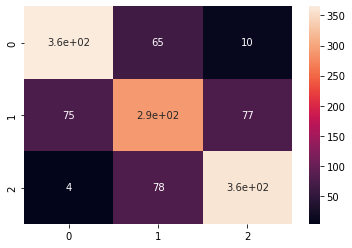

In [62]:
sns.heatmap(confusion_matrix(y_test, pred), annot = True)

In [63]:
y_proba =  model.predict_proba(X_test)

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [64]:
roc_auc_score(y_test, y_proba ,average= 'weighted',  multi_class='ovr')

0.8809334041683634

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywor

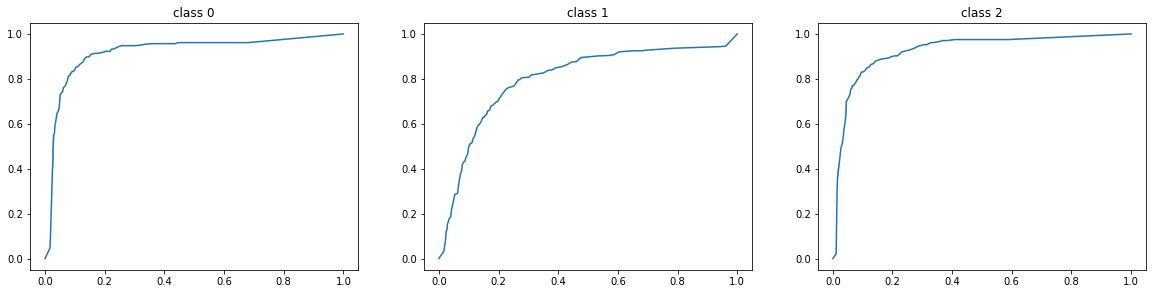

In [70]:
plt.figure(figsize=(20,10))
for i in range(3):
    df = X_test.copy()
    df['class'] = [1 if y == i + 1 else 0 for y in y_test]
    df['probality'] = y_proba[:, i]
    
    ax = plt.subplot(2, 3, i+4)
    tpr, fpr, th = roc_curve(df['class'], df['probality'])
    sns.lineplot(tpr, fpr, ax = ax)
    ax.set_title("class " + str(i))

## Notes on all the above models:
- Without using Grid Search for hyperparameters tuning, The accuracy was nearly 73.68% for hold out method, and 74.11% for 10-fold cross validation, and the two of them is less than the result we get using Grid Search (76.61%).
- The last model (the hyperparameters tuned one) is not able to detect the class(1) properly, because looking on the confusion matrix and recall ratio for this class, we see that the model was not capable of detecting nearly 34% of the class (1) data.
- For the last model (the hyperparameters tuned one), we see that we can not trust its judgment about class (1), because looking on the confusion matrix and precision ratio for this class, we see that out of all the examples the model predicted to belong to class (1), only 66% actually belonged.
- For the last model (the hyperparameters tuned one), we notice that the area under ROC curve is bigger for classes (0) and (2) than class (1), and this indicates that the model is able to detect classes (0) and (2) better than class (1).